# Материалы

- [Презентация](https://disk.yandex.ru/i/b3W_XLFhJfGuDQ)
- [Дашборд](https://public.tableau.com/views/YP_Main_Project_bank/Dashboard_clients_by_products?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

<a id="project_description"></a>

# Описание проекта

В региональном банке «Метанпром», филиалы которого расположены в Ярославле, Ростове Великом и Рыбинске, в последнее время драматически повысился отток клиентов. Это может стать проблемой, угрожающей существованию банка.

Отдел маркетинга решил провести исследование и составить портрет клиентов, которые склонны уходить из банка, чтобы в дальнейшем провести маркетинговое воздействие с целью уменьшения оттока.

**Цель исследования**
- Составить портрет клиентов, которые склонны уходить из банка, чтобы использовать полученные знания для снижения оттока клиентов.

**Задачи исследования**
- Определить показатели, которые влияют на отток.
- Выделить сегменты клиентов, в которых наиболее высока доля уходящих клиентов, чтобы они были однородными, высокоточными и покрывали максимум проблемных зон банка.
- Дать рекомендации для заказчика по приоритетным сегментам клиентов.


**Ход исследования**

Исследование пройдёт в несколько этапов.

- Обзор данных.
- Подготовка данных.
- Исследовательский анализ данных.
- Проверка статистических гипотез.
- Выделение показателей, влияющих на отток.
- Составление портретов пользователей.
- Подготовка выводов и рекомендаций для заказчиков.
- Подготовка презентации.
- Построение дашборда.


__Описание данных__

- `userid` — идентификатор пользователя;
- `score` — баллы кредитного скоринга;
- `city` — город;
- `gender` — пол;
- `age` — возраст;
- `equity`  — количество баллов собственности;
- `balance` — баланс на счёте;
- `products` — количество продуктов, которыми пользуется клиент;
- `credit_card` — есть ли кредитная карта;
- `last_activity` — активный ли клиент;
- `est_salary` — заработная плата клиента;
- `churn` — ушёл или нет.

<a id="familiarity"></a>

## Знакомство с данными

__Загрузка библиотек__

In [1]:
#загрузим библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import math as mth
import itertools

from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest

__Настройка окружения__

In [2]:
#настроим переменные окружения

#установим стиль графиков
sns.set_style('white')

#устанавливаем палитру цветов
sns.set_palette(palette='colorblind')

#настроим вывод так, чтобы текст в ячейке отображался полностью, вне зависимости от длины
pd.set_option('display.max_colwidth', None)

#настроим вывод, чтобы все числа отражались с двумя знаками после запятой;
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
#объявим класс color, чтобы иметь возможность выделять текст цветом и толщиной
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

<a id="functions"></a>

### Объявление функций

__Определим функцию для ознакомления с датасетом__

Функция будет принимать на вход название датасета и выводить его характеристики: первые строки (head), общую информацию (info), сводку статистических данных (describe), количество дубликатов и т.п. 

__Функция dataset_overview__

In [4]:
def dataset_overview (df):
    #выводим количество записей в датафрейме
    print(f'{color.BOLD}{"Количество записей в датафрейме: "}{color.END}{len(df)}\n')
    
    #выводим первые строки
    print(f'{color.BOLD}{"Выведем первые пять строк датасета:"}{color.END}')
    display(df.head())
    
    #выводим общую информацию
    print(f'\n{color.BOLD}{"Общая информация о датасете:"}{color.END}\n')
    print(df.info())
    print()
    
    #выводим статистические данные о столбцах
    print(f'{color.BOLD}{"Получим представление о распределении данных в столбцах:"}{color.END}')
    display(df.describe(include='all'))
    print(f'\n{color.BOLD}{"Количество дубликатов среди записей: "}{color.END}{df_bank.duplicated().sum()}\n')
    
    #проверяем есть ли пустые значения в столбцах
    #создаем датафрейм в котором укажем названия столбцов и количество пропусков
    col_with_nulls = (pd.DataFrame(df_bank.isna().sum())
                     .rename(columns={0: 'null_count'})
                     .query('null_count > 0')
    )
    #если пропуски есть, то выводим информацию об их количестве и доле от общего количества записей
    if len(col_with_nulls) > 0:
        print(f'{color.BOLD}{"Количество столбцов, в которых есть пропуски: "}{color.END}{len(col_with_nulls)}')
        #посчитаем процент пропусков
        col_with_nulls_mean = (pd.DataFrame(round(df_bank.isna().mean()*100, 2))
                     .rename(columns={0: 'null_percent'})
                     .query('null_percent > 0')
        )
        #выведем информацию о количестве и проценте пропусков в столбцах
        print(f'{color.BOLD}{"Количество и процент пропусков в столбце: "}{color.END}')
        display (col_with_nulls.join(col_with_nulls_mean)
               .sort_values(by='null_count', ascending=False)
               .rename(columns={'null_count' : 'Количество пропусков', 'null_percent' : 'Процент пропусков'})
               .style
               .format({'Процент пропусков': '{:.2f}%'})
               .background_gradient(cmap='coolwarm')
        ) 
    else:
        #иначе, если столбцы с пропусками отсутствуют, то здесь выводим информацию об этом.
        print(f'{color.BOLD}{"Количество столбцов, в которых есть пропуски: "}{color.END}{len(col_with_nulls)}\n')        

__Определим функцию для вычисления Q3 + 1,5*IQR__

Функция будет принимать на вход название датасета и имя столбца и возращать значение, которое соответствует отступу в 1,5 межквартильного размаха от 3 квартиля.  Это пригодится для определения верхней границы, по которой можно будет рассматривать исключение данных из дальнейшего анализа, если решим, что они являются выбросами.

__Функция upper_limit__

In [5]:
def upper_limit(df, column_name):
    #получаем значения первого и третьего квартилей
    q1, q3 = np.percentile(df[~df[column_name].isna()][column_name], [25, 75])

    #вычисляем межквартильный размах
    iqr = q3 - q1

    upper_limit = round(q3 + 1.5*iqr)

    return upper_limit

<a id="open_file"></a>

### Открываем файл

In [6]:
# определяем путь+имя_файла для чтения с удалённого или локального диска 
remote_path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
local_path = 'C:\\Users\\alexv\\datasets\\bank_scrooge.csv'

In [7]:
#открываем датасет
try:
    df_bank = pd.read_csv(remote_path)
except:
    df_bank = pd.read_csv(local_path)

<a id="first_info"></a>

### Изучаем общую информацию

__Выводим характеристики наших данных__

Вызовем функцию dataset_overview и передадим ей на вход название датафрейма.

In [8]:
#вызываем функцию для первичного знакомства с данными
dataset_overview(df_bank)

Количество записей в датафрейме: 10000

Выведем первые пять строк датасета:


USERID  score       city gender   age  equity    balance  products  \
0  183012 850.00    Рыбинск      Ж 25.00       1   59214.82         2   
1  146556 861.00    Рыбинск      Ж 37.00       5  850594.33         3   
2  120722 892.00    Рыбинск      Ж 30.00       0        NaN         1   
3  225363 866.00  Ярославль      Ж 51.00       5 1524746.26         2   
4  157978 730.00  Ярославль      М 34.00       5     174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1


Общая информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None

Получим представление о распределении данных в столбцах:


USERID    score       city gender     age   equity      balance  \
count   10000.00 10000.00      10000  10000 9974.00 10000.00      7705.00   
unique       NaN      NaN          3      2     NaN      NaN          NaN   
top          NaN      NaN  Ярославль      М     NaN      NaN          NaN   
freq         NaN      NaN       5888   5005     NaN      NaN          NaN   
mean   171814.71   848.70        NaN    NaN   42.73     2.63    827794.31   
std     33708.24    65.45        NaN    NaN   12.18     1.98   1980614.15   
min     94561.00   642.00        NaN    NaN   18.00     0.00         0.00   
25%    142810.25   802.00        NaN    NaN   33.00     0.00    295554.16   
50%    172728.00   853.00        NaN    NaN   40.00     3.00    524272.20   
75%    201261.75   900.00        NaN    NaN   51.00     4.00    980705.85   
max    229145.00  1000.00        NaN    NaN   86.00     9.00 119113552.01   

        products  credit_card  last_activity  EST_SALARY    churn  
count   10000.00     10000.00       10000.00    10000.00 10000.00  
unique       NaN          NaN            NaN         NaN      NaN  
top          NaN          NaN            NaN         NaN      NaN  
freq         NaN          NaN            NaN         NaN      NaN  
mean        1.87         0.68           0.52   147866.89     0.18  
std         0.79         0.47           0.50   139388.51     0.39  
min         0.00         0.00           0.00     2546.30     0.00  
25%         1.00         0.00           0.00    75251.90     0.00  
50%         2.00         1.00           1.00   119658.10     0.00  
75%         2.00         1.00           1.00   174500.54     0.00  
max         5.00         1.00           1.00  1395064.45     1.00


Количество дубликатов среди записей: 0

Количество столбцов, в которых есть пропуски: 2
Количество и процент пропусков в столбце: 


__При первом знакомстве с данными можно отметить:__
- Наименования столбцов указаны в разных регистрах, следует привести их к общему виду;
- У нас есть данные о 10000 клиентах;
- В данных отсутствуют отрицательные значения;
- Среди записей нет полных дубликатов;
- В двух столбцах есть пропущенные значения: в колонке `balance` их доля составляет 22,95%, а в `age` - 0,26%.
- Диапазон значений в столбце `score` — баллы кредитного скоринга, составляет от 642 до 1000;
- В столбцах `balance` и `est_salary` довольно большие значения стандартного отклонения, следует проверить эти столбцы на наличие выбросов. 
- Количество баллов собственности `equity` лежит в пределах от 0 до 9.
- Количество продуктов `products`, которыми пользуются клиенты, меняется от 0 до 5.


__Приведём названия колонок к общему виду__

In [9]:
#переводим названия всех столбцов в нижний регистр
df_bank.columns = df_bank.columns.str.lower()

In [10]:
#выводим имена столбцов
print(f'Наименования столбцов после преобразования:')
for name in df_bank.columns:
    print(name)

Наименования столбцов после преобразования:
userid
score
city
gender
age
equity
balance
products
credit_card
last_activity
est_salary
churn


<a id="preprocessing"></a>

## Предобработка данных

__Сформируем функцию `column_distribution`__, которая будет выводить гистограмму, boxplot и описательные статистики для определённого столбца. Если столбец содержит не числовые значения, то будем выводить список уникальных значений и информацию о наличии пропусков.

In [11]:
#создаём функцию для вывода информации о распределении данных в столбце
def column_distribution(df, column_name, xlabel='', ylabel='', bins=30): 

    #если столбец содержит строки, то выполняем вывод уникальных значений
    if df[column_name].dtype == 'object':
        print(f'\033[1m{"Уникальные значения в столбце "}\033[0m{column_name}:')
        for item in df[column_name].unique():
            print(item)
    #если же столбец содержит числовые значения, то строим гистограммы и выводим статистические данные
    else:      
        fig, (ax_box, ax_hist) = plt.subplots(2, figsize=(12,8), sharex=True, gridspec_kw = {'height_ratios': (.15, .85)})
        plt.suptitle('Распределение в столбце ' + column_name)

        sns.boxplot(x=df[column_name], ax=ax_box)
        ax_box.set_xlabel('')

        sns.histplot(data=df[column_name], bins=bins, ax=ax_hist)
        ax_hist.set_xlabel(xlabel)
        ax_hist.set_ylabel(ylabel)

        plt.show()

        print('Статистики по столбцу ' + column_name + ':')
        print(df[column_name].describe())
    
    #выводим  информацию о количестве и доле пропусков в столбце
    print()
    if df[column_name].isna().sum() == 0:
        print(f'\033[1m{"Пропуски в столбце "}{column_name}{", в представленном срезе, отсутствуют."}\033[0m')
    else:
        print(f'\033[1m{"Количество пропусков в столбце "}{column_name}{": "}{df[column_name].isna().sum()}\033[0m')
        print(f'\033[1m{"Доля пропусков в столбце "}{column_name}{": "}{round(df[column_name].isna().mean(),4):.2%}\033[0m')

<a id="columns_type"></a>

### Типы данных в столбцах

Выведем типы данных столцов:

In [12]:
print(df_bank.dtypes)

userid             int64
score            float64
city              object
gender            object
age              float64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
est_salary       float64
churn              int64
dtype: object


Так как колонки `score` и `age` содержат целые числа, преобразуем тип данных в этих столбцах, заменим float на int.

In [13]:
df_bank['age'] = df_bank['age'].astype('Int64')
df_bank['score'] = df_bank['score'].astype('int')

<a id="col_userid"></a>

### Столбец `userid`

Проверим, встречаются ли одинаковые идентификаторы клиентов:

In [14]:
print(f"Количество клиентов, у которых userid не является уникальным: {df_bank.duplicated(subset=['userid'], keep=False).sum()}")

Количество клиентов, у которых userid не является уникальным: 146


Выведем примеры записей с повторяющимися userid

In [15]:
display(df_bank[df_bank.duplicated(subset=['userid'], keep=False)].sort_values(by='userid').head(10))

userid  score       city gender  age  equity    balance  products  \
1893  116540    883    Рыбинск      Ж   55       1  362756.49         3   
7694  116540    887  Ярославль      Ж   38       0        NaN         1   
7542  117943    880  Ярославль      Ж   40       0        NaN         1   
4866  117943    855    Рыбинск      Ж   32       6 1036832.93         4   
5896  120258    905  Ярославль      М   30       0        NaN         1   
5863  120258    908    Рыбинск      Ж   38       4 2213581.63         2   
1411  123461    829  Ярославль      Ж   59       0   96222.44         2   
8638  123461    934    Рыбинск      М   34       0        NaN         2   
8164  124450    859  Ярославль      Ж   38       6  516811.20         1   
9775  124450    758    Рыбинск      Ж   36       0   73574.07         2   

      credit_card  last_activity  est_salary  churn  
1893            0              1   175920.48      1  
7694            0              1   119247.61      0  
7542            1              0   137718.93      0  
4866            1              1   107792.71      1  
5896            1              1   146427.96      0  
5863            0              1   160327.77      1  
1411            0              1   102771.55      1  
8638            1              0   291619.27      0  
8164            1              1    95144.63      1  
9775            0              1    79963.59      0

Клиенты с одинаковым userid различаются по всем остальным признакам. То есть это разные уникальные клиенты, у которых произошло пересечение идентификатора userid. Можно заметить, что клиенты с одинаковым userid встречаются в разных городах. 

Проверим, существуют ли клиенты из одного города, пересекающиеся по значению userid.

In [16]:
print(f"Количество клиентов из одного города, у которых userid не является уникальным: {df_bank.duplicated(subset=['userid', 'city'], keep=False).sum()}")

Количество клиентов из одного города, у которых userid не является уникальным: 0


Таких записей нет, поэтому можно предположить, что банковские системы в разных городах не учитывают наличие аналогичного userid в другом городе.
Для целей нашего исследования не критично пересечение значений userid, поэтому не будем выполнять переиндексирование значений. Также при необходимости указать на конкретного пользователя, мы сможем определить его уникальность по двум полям: `userid` и `city`.

<a id="col_score"></a>

### Столбец `score`

Посмотрим на распределение баллов кредитного скоринга.

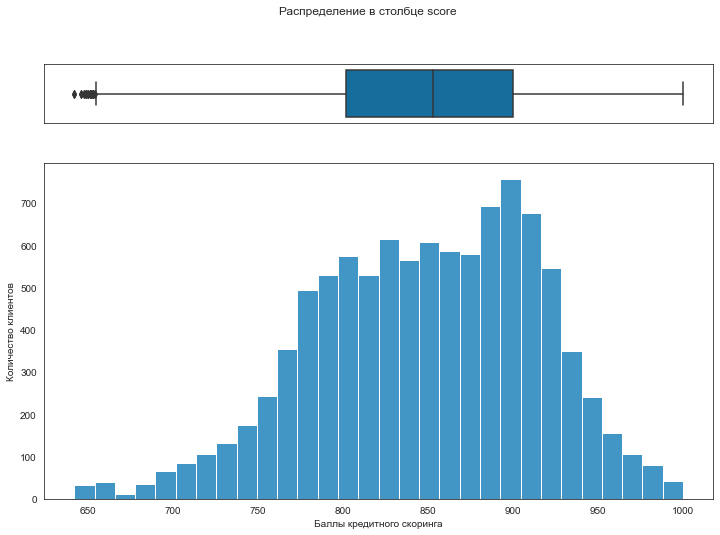

Статистики по столбцу score:
count   10000.00
mean      848.70
std        65.45
min       642.00
25%       802.00
50%       853.00
75%       900.00
max      1000.00
Name: score, dtype: float64

Пропуски в столбце score, в представленном срезе, отсутствуют.


In [17]:
#вызываем функцию column_distribution для столбца score
column_distribution(df_bank, 'score', 'Баллы кредитного скоринга', 'Количество клиентов')

Баллы кредитного скоринга находятся в диапазоне от 642 до 1000. В распределении есть небольшой пик в районе значений чуть более 900 баллов. Не отмечено аномальных значений.

<a id="col_city"></a>

### Столбец `city`

Посмотрим, какие наименования городов присутствуют в наших данных.

In [18]:
column_distribution(df_bank, 'city')

Уникальные значения в столбце city:
Рыбинск
Ярославль
Ростов

Пропуски в столбце city, в представленном срезе, отсутствуют.


Клиенты располагаются в трёх городах. Пропусков или некорректных значений в столбце `city` не отмечено.

<a id="col_gender"></a>

### Столбец `gender`

In [19]:
column_distribution(df_bank, 'gender')

Уникальные значения в столбце gender:
Ж
М

Пропуски в столбце gender, в представленном срезе, отсутствуют.


В столбце `gender` также содержатся корректные значения.

<a id="col_age"></a>

### Столбец `age`

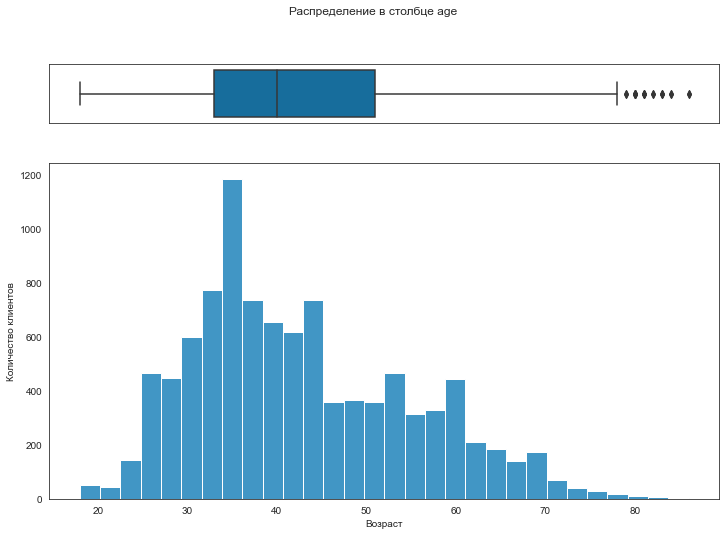

Статистики по столбцу age:
count   9974.00
mean      42.73
std       12.18
min       18.00
25%       33.00
50%       40.00
75%       51.00
max       86.00
Name: age, dtype: float64

Количество пропусков в столбце age: 26
Доля пропусков в столбце age: 0.26%


In [20]:
#вызываем функцию column_distribution для столбца age
column_distribution(df_bank, 'age', 'Возраст', 'Количество клиентов')

Есть 26 записей, у которых отсутствует указание возраста.

Возраст клиентов начинается с 18 лет. По распределению видно, что наибольшее количество клиентов в возрасте от 30 до 50 лет. Медианное значение возраста равняется 40 годам.
Клиентов старше 70 лет немного. 

Посмотрим на строки с незаполненным возрастом, а затем определим верхнюю границу возраста, после которой редко встречаются клиенты.

Выведем информацию по клиентам, у которых не заполнен возраст.

In [21]:
print('Клиенты, у которых не заполнен возраст:')
display(df_bank[df_bank['age'].isna()])

Клиенты, у которых не заполнен возраст:


userid  score       city gender   age  equity    balance  products  \
1247  228075    932  Ярославль      М  <NA>       5 7601719.20         2   
2165  187635    692    Рыбинск      Ж  <NA>       0        NaN         1   
2444  221156    913  Ярославль      М  <NA>       0        NaN         1   
3091  138660    836     Ростов      Ж  <NA>       5  294315.53         2   
4912  210674    834    Рыбинск      М  <NA>       1  238330.52         2   
5470  218868    827    Рыбинск      Ж  <NA>       4  448959.07         2   
5495  151662    884    Рыбинск      Ж  <NA>       0        NaN         1   
7236  210135    908    Рыбинск      Ж  <NA>       4 1120340.31         3   
7248  219343    920    Рыбинск      Ж  <NA>       0        NaN         1   
7345  184913    829  Ярославль      Ж  <NA>       3  188648.77         2   
7409  214031    777  Ярославль      М  <NA>       2  171510.23         1   
8015  198635    670  Ярославль      Ж  <NA>       0        NaN         1   
8070  226550    940    Рыбинск      М  <NA>       0        NaN         1   
8293  216848    930  Ярославль      М  <NA>       0        NaN         1   
8385  206759    915    Рыбинск      М  <NA>       0        NaN         1   
8449  210898    805  Ярославль      Ж  <NA>       0        NaN         1   
8632  221197    893  Ярославль      М  <NA>       0        NaN         1   
8785  127440    663  Ярославль      М  <NA>       0        NaN         1   
9104  222480    776    Рыбинск      Ж  <NA>       5  796735.09         1   
9301  202983    942    Рыбинск      Ж  <NA>       0        NaN         1   
9380  187459    894    Рыбинск      М  <NA>       0        NaN         1   
9457  141945    929  Ярославль      М  <NA>       0        NaN         1   
9632  185829    927  Ярославль      М  <NA>       0        NaN         1   
9634  221809    917  Ярославль      М  <NA>       0        NaN         1   
9667  163657    849  Ярославль      М  <NA>       4 1254013.85         2   
9819  140934    832    Рыбинск      Ж  <NA>       3  385763.16         2   

      credit_card  last_activity  est_salary  churn  
1247            1              1   408121.16      0  
2165            1              1   160368.82      0  
2444            1              1   135693.24      0  
3091            0              1    63310.22      1  
4912            0              1    93775.06      0  
5470            1              1    67835.95      0  
5495            1              1   137500.77      0  
7236            1              1    85002.15      0  
7248            1              0   159248.67      0  
7345            0              1    75206.90      0  
7409            1              1    75409.63      0  
8015            1              1   168699.33      0  
8070            0              1   147696.95      0  
8293            1              1   199542.51      0  
8385            1              0    71179.53      0  
8449            0              1   922080.25      0  
8632            1              0   173929.92      0  
8785            1              1   117197.56      0  
9104            1              1    55073.63      0  
9301            1              1   163804.73      0  
9380            1              0   178012.28      0  
9457            1              0   381868.89      0  
9632            1              0   231254.86      0  
9634            1              1   192644.15      0  
9667            1              1   119106.67      0  
9819            0              1    59651.35      0

Оставим эти строки, они пригодятся при анализе других параметров, а в момент проведения анализа в разрезе возраста, их можно будет не учитывать.

Расчитаем межквартильный размах, и определим верхнюю границу возраста, превышающую третий квартиль на 1,5 межквартильных размаха.

In [22]:
#определяем Q3 + 1,5*IQR

upper_age = upper_limit(df_bank, 'age')

print(f"Возраст, соответствующий Q3 + 1,5*IQR = {upper_age}")

Возраст, соответствующий Q3 + 1,5*IQR = 78


Выведем информацию о клиентах старше 78 лет.

In [23]:
print(f"Клиенты старше {round(upper_age)} лет:")
print(f"количество: {len(df_bank[df_bank['age']>78])}")
display(df_bank[df_bank['age']>78])

Клиенты старше 78 лет:
количество: 22


userid  score       city gender  age  equity    balance  products  \
219   161758    754  Ярославль      Ж   80       1  332616.82         3   
396   205650    869     Ростов      Ж   80       4  570064.04         2   
540   188460    720  Ярославль      Ж   80       0        NaN         1   
1283  127231    796    Рыбинск      Ж   80       1  347590.32         2   
1621  151166    916    Рыбинск      Ж   83       0        NaN         1   
1987  219132    827    Рыбинск      Ж   82       3  275391.31         2   
2063  115610    823  Ярославль      Ж   81       2  139576.56         2   
2795  214518    820  Ярославль      Ж   83       3 1137456.03         3   
3272  207759    888  Ярославль      Ж   84       3 1287558.90         2   
4387  117913    658    Рыбинск      Ж   81       0        NaN         1   
4703  219171    851     Ростов      Ж   80       3  411612.85         1   
5602  151854    707  Ярославль      Ж   81       0        NaN         1   
5673  147965    854  Ярославль      Ж   81       3  803337.98         2   
7569  161512    892  Ярославль      Ж   79       3  337392.63         2   
8237  208065    785    Рыбинск      Ж   82       2 1221645.78         3   
8957  147837    962    Рыбинск      Ж   79       3        NaN         0   
9176  116838    777  Ярославль      Ж   86       3  772929.83         1   
9302  168360    960    Рыбинск      Ж   80       0        NaN         1   
9413  135210    921  Ярославль      Ж   86       0        NaN         1   
9423  159150    872    Рыбинск      Ж   84       3  418462.51         1   
9442  196479    872     Ростов      Ж   83       4  546313.32         1   
9462  140275    898  Ярославль      Ж   80       2 1331131.18         2   

      credit_card  last_activity  est_salary  churn  
219             0              1   114804.27      0  
396             0              0    25503.20      0  
540             1              1   153804.84      0  
1283            1              0    27123.50      0  
1621            1              1    55681.82      0  
1987            0              0    59205.90      0  
2063            0              1   146201.01      0  
2795            0              0    18037.97      0  
3272            0              1    97982.17      0  
4387            1              1   105088.10      0  
4703            1              1    22280.91      0  
5602            1              0   102360.77      0  
5673            0              1    50386.82      0  
7569            1              0   103858.46      0  
8237            1              1    66059.88      0  
8957            0              0    25063.96      1  
9176            1              1    40877.18      0  
9302            0              1   548776.90      0  
9413            0              1    36185.91      0  
9423            1              1    34945.79      0  
9442            1              1    91801.67      0  
9462            1              1   107008.80      0

Оставим данных клиентов для дальнейшего анализа.

<a id="col_equity"></a>

### Столбец `equity`

Посмотрим на распределение значений баллов, оценивающих собственность клиента.

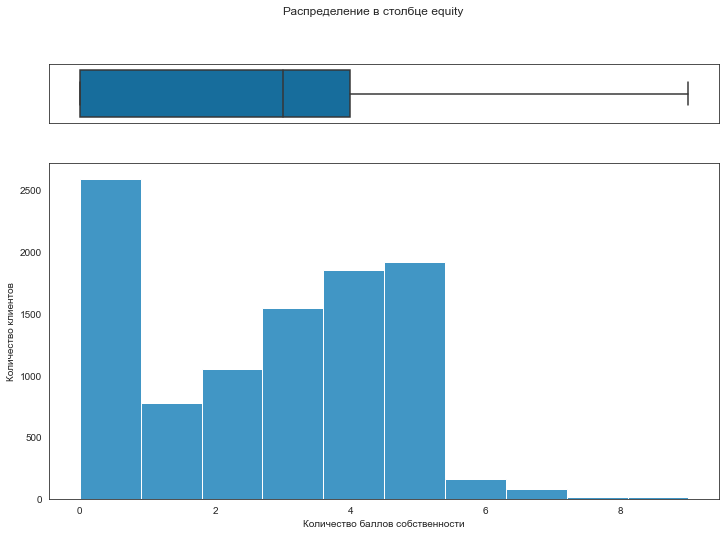

Статистики по столбцу equity:
count   10000.00
mean        2.63
std         1.98
min         0.00
25%         0.00
50%         3.00
75%         4.00
max         9.00
Name: equity, dtype: float64

Пропуски в столбце equity, в представленном срезе, отсутствуют.


In [24]:
column_distribution(df_bank, 'equity', 'Количество баллов собственности', 'Количество клиентов', bins=10)

Аномальных или некорректных значений в столбце `equity` не встречается. Собственность клиентов измеряется в диапазоне от 0 до 9 баллов. Больше всего клиентов имеют 0 баллов, то есть видимо не обзавелись собственностью.

<a id="col_balance"></a>

### Столбец `balance`

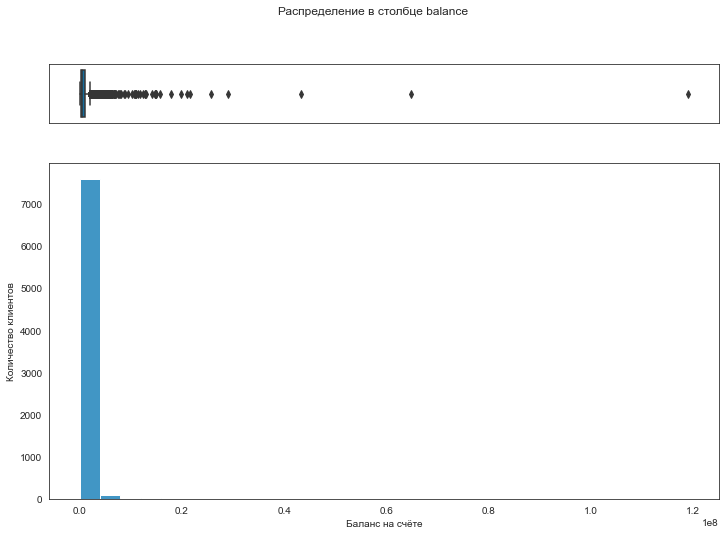

Статистики по столбцу balance:
count        7705.00
mean       827794.31
std       1980614.15
min             0.00
25%        295554.16
50%        524272.20
75%        980705.85
max     119113552.01
Name: balance, dtype: float64

Количество пропусков в столбце balance: 2295
Доля пропусков в столбце balance: 22.95%


In [25]:
column_distribution(df_bank, 'balance', 'Баланс на счёте', 'Количество клиентов')

Почти 23% записей не содержат информацию об остатке на счёте. Возможную зависимость отсутствия баланса от других признаков попытаемся найти позже, на этапе исследовательского анализа.

Есть выбросы в значениях остатка на счёте. Уменьшим верхнюю границу баланса, чтобы иметь возможность рассмотреть распределение.

In [26]:
#определяем Q3 + 1,5*IQR

upper_bound = upper_limit(df_bank, 'balance')

print(f"Баланс на счёте, соответствующий Q3 + 1,5*IQR = {upper_bound} рублей")

Баланс на счёте, соответствующий Q3 + 1,5*IQR = 2008433 рублей


Ограничим верхнюю границу баланса четырьмя миллионами рублей и построим гистограмму.

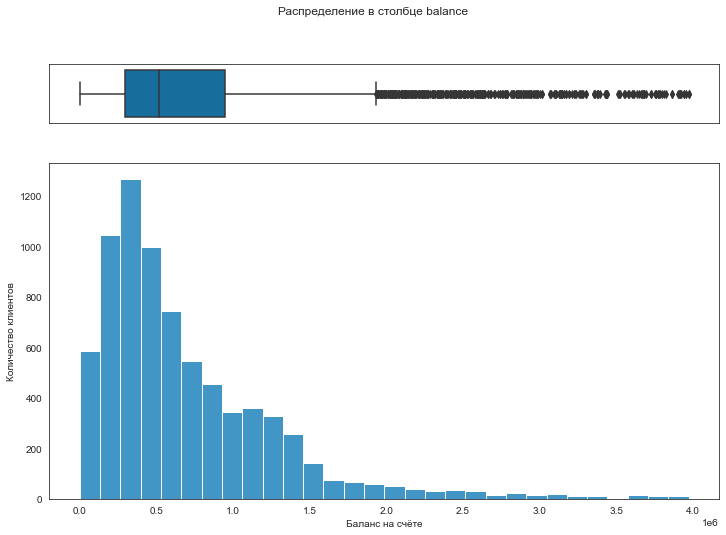

Статистики по столбцу balance:
count      7593.00
mean     701132.15
std      605802.89
min           0.00
25%      292847.34
50%      514117.15
75%      949132.82
max     3971985.11
Name: balance, dtype: float64

Пропуски в столбце balance, в представленном срезе, отсутствуют.


In [27]:
column_distribution(df_bank[df_bank['balance']<4000000], 'balance', 'Баланс на счёте', 'Количество клиентов')

Медианное значение остатка на счёте составляет около полумиллионна рублей.

Более 2 миллионов рублей на остатке встречается редко. Для дополнительного анализа добавим столбец, в котором выделим категории баланса: баланс неизвестен, баланс от 0 до 0.5 млн, от 0.5 до 1 млн, от 1 до 2 млн. и свыше 2 млн. Добавление столбца выполним чуть позже в отдельном пункте, в завершении текущего раздела по предобработке данных.

<div class="alert alert-block alert-success">
   <b>✔️ Комментарий ревьюера:</b> Отличное решение
</div>


<a id="col_products"></a>

### Столбец `products`

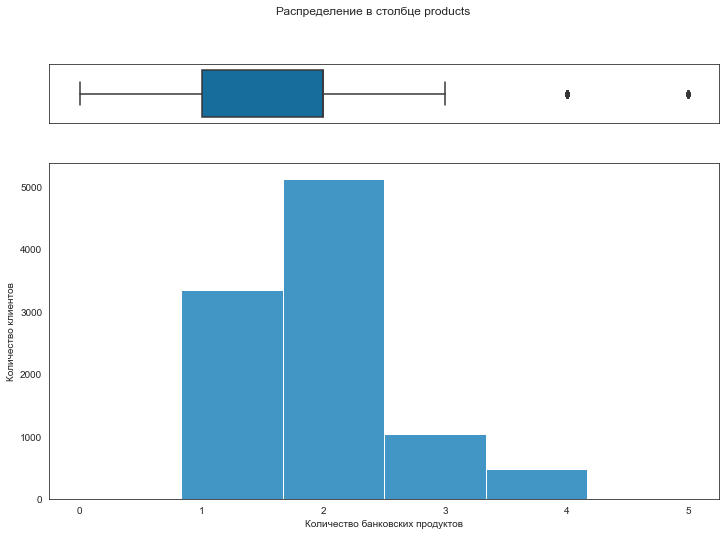

Статистики по столбцу products:
count   10000.00
mean        1.87
std         0.79
min         0.00
25%         1.00
50%         2.00
75%         2.00
max         5.00
Name: products, dtype: float64

Пропуски в столбце products, в представленном срезе, отсутствуют.


In [28]:
#вызываем функцию column_distribution для столбца products
column_distribution(df_bank, 'products', 'Количество банковских продуктов', 'Количество клиентов', bins=6)

Большинство клиентов имеют 1-2 продукта. 

Выведем информацию о клиентах, у которых отсутствуют продукты.

In [29]:
print('Клиенты, у которых ноль продуктов:')
display(df_bank[df_bank['products']==0])

Клиенты, у которых ноль продуктов:


userid  score     city gender  age  equity  balance  products  \
8957  147837    962  Рыбинск      Ж   79       3      NaN         0   

      credit_card  last_activity  est_salary  churn  
8957            0              0    25063.96      1

Так как нашёлся единственный клиент с нулевым количеством продуктов, то можно предположить, что у клиентов банка должен быть как минимум один продукт, и для данного клиента следует указать минимальное количество продуктов равное 1.

In [30]:
#заменяем нулевое количество продуктов на минимально возможное, на единицу
df_bank.loc[df_bank['products']==0, 'products'] = 1

<a id="credit_card"></a>

### Столбец `credit_card`

Выведем уникальные значения и их количество в столбце `credit_card`:

In [31]:
print(df_bank['credit_card'].value_counts())

1    6804
0    3196
Name: credit_card, dtype: int64


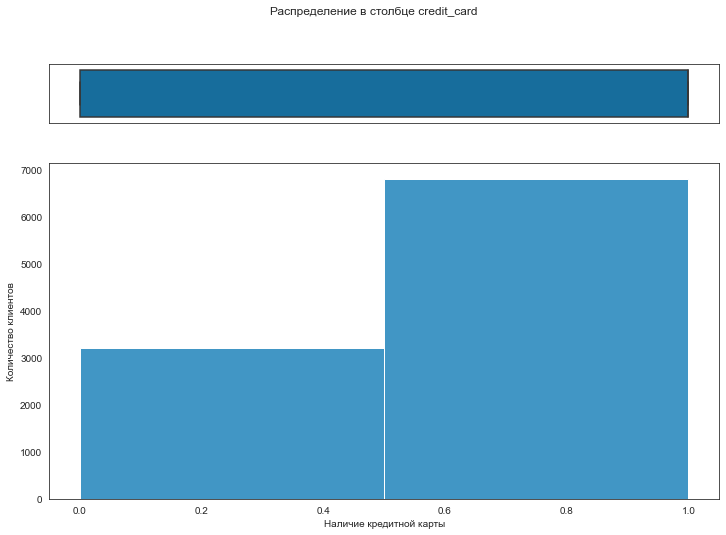

Статистики по столбцу credit_card:
count   10000.00
mean        0.68
std         0.47
min         0.00
25%         0.00
50%         1.00
75%         1.00
max         1.00
Name: credit_card, dtype: float64

Пропуски в столбце credit_card, в представленном срезе, отсутствуют.


In [32]:
#вызываем функцию column_distribution для столбца credit_card
column_distribution(df_bank, 'credit_card', 'Наличие кредитной карты', 'Количество клиентов', bins=2)

Пропуски и аномальные значения отсутствуют.

<a id="last_activity"></a>

### Столбец `last_activity`

In [33]:
print(df_bank['last_activity'].value_counts())

1    5235
0    4765
Name: last_activity, dtype: int64


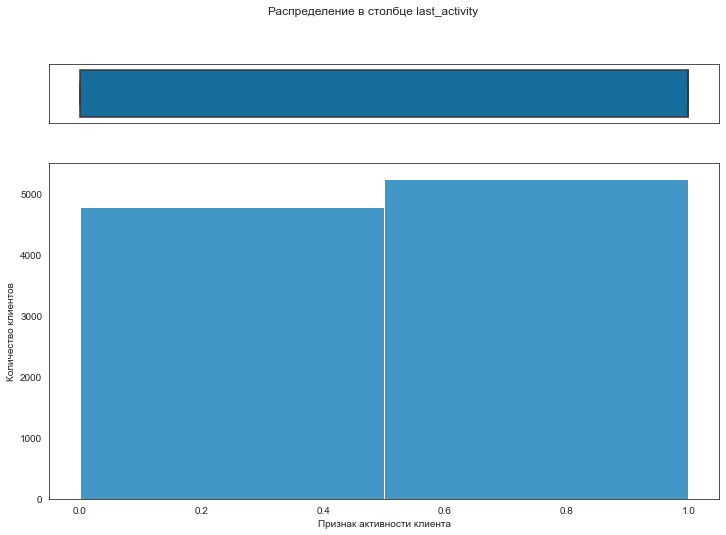

Статистики по столбцу last_activity:
count   10000.00
mean        0.52
std         0.50
min         0.00
25%         0.00
50%         1.00
75%         1.00
max         1.00
Name: last_activity, dtype: float64

Пропуски в столбце last_activity, в представленном срезе, отсутствуют.


In [34]:
#вызываем функцию column_distribution для столбца last_activity
column_distribution(df_bank, 'last_activity', 'Признак активности клиента', 'Количество клиентов', bins=2)

По признаку активности клиенты делятся примерно поровну. Некорректных значений в столбце нет.

<a id="est_salary"></a>

### Столбец `est_salary`

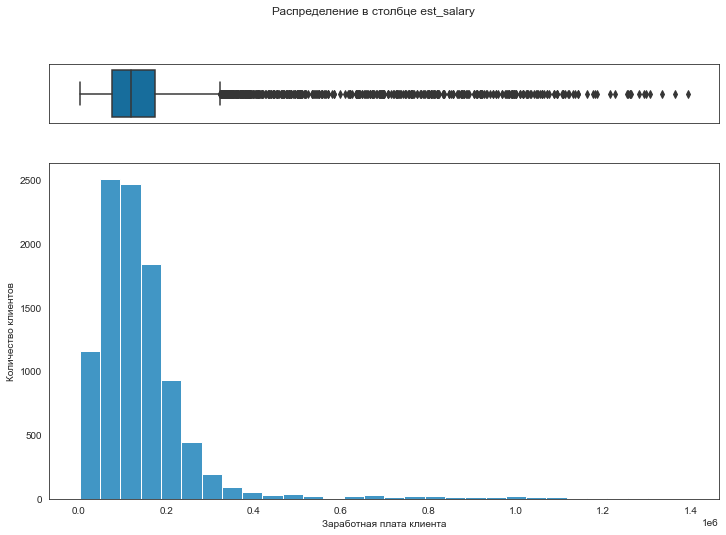

Статистики по столбцу est_salary:
count     10000.00
mean     147866.89
std      139388.51
min        2546.30
25%       75251.90
50%      119658.10
75%      174500.54
max     1395064.45
Name: est_salary, dtype: float64

Пропуски в столбце est_salary, в представленном срезе, отсутствуют.


In [35]:
#вызываем функцию column_distribution для столбца est_salary
column_distribution(df_bank, 'est_salary', 'Заработная плата клиента', 'Количество клиентов')

Зарплаты более 400 тысяч рублей встречаются редко. Ограничим верхнюю границу и ещё раз посмотрим на распределение.

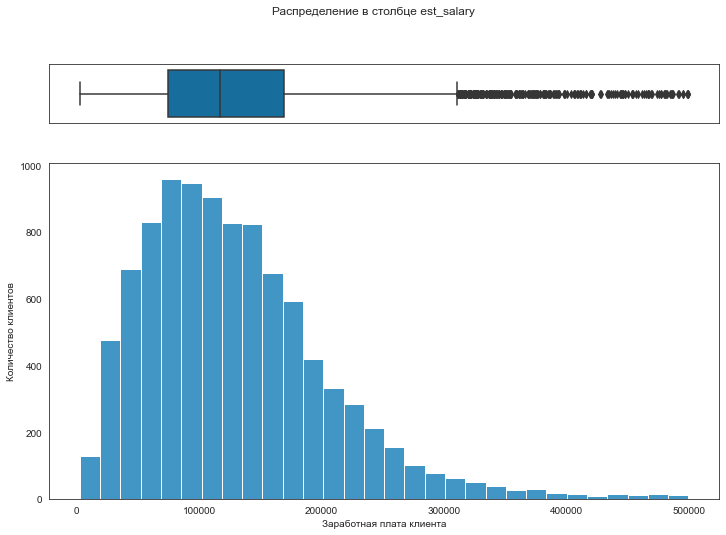

Статистики по столбцу est_salary:
count     9733.00
mean    129176.89
std      75389.41
min       2546.30
25%      74213.80
50%     117278.07
75%     168922.62
max     499486.23
Name: est_salary, dtype: float64

Пропуски в столбце est_salary, в представленном срезе, отсутствуют.


In [36]:
#вызываем функцию column_distribution для столбца est_salary с ограничением по сумме
column_distribution(df_bank[df_bank['est_salary']<500000], 'est_salary', 'Заработная плата клиента', 'Количество клиентов')

Выделим категории зарплат: до 100 тысяч рублей, от 100 до 200 тысяч, от 200 до 300, от 300 до 400 и свыше 400 тысяч рублей. Добавление столбца с такими категориями выполним чуть позже в отдельном разделе.

Строки с выбивающимися в большую сторону зарплатами не будем удалять из анализа, при необходимости отфильтруем их на этапе проверки статистических гипотез.

<a id="churn"></a>

### Столбец `churn`

In [37]:
print(df_bank['churn'].value_counts())

0    8180
1    1820
Name: churn, dtype: int64


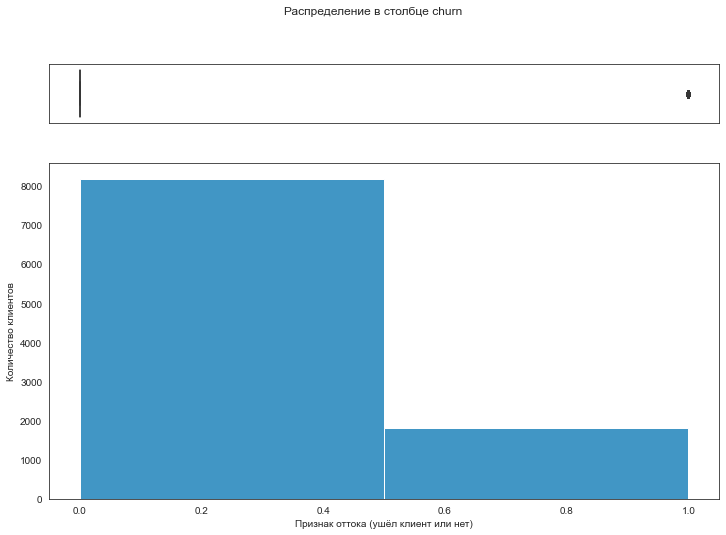

Статистики по столбцу churn:
count   10000.00
mean        0.18
std         0.39
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: churn, dtype: float64

Пропуски в столбце churn, в представленном срезе, отсутствуют.


In [38]:
#вызываем функцию column_distribution для столбца churn
column_distribution(df_bank, 'churn', 'Признак оттока (ушёл клиент или нет)', 'Количество клиентов', bins=2)

В столбце `churn` данные корректны, пропуски отсутствуют.

<a id="add_age_category"></a>

### Добавление признаков: категория по возрасту

Добавим колонку с категорией по возрасту. 

Возрастные диапазоны определим в следующей функции:

In [39]:
#создаём функцию для выделения категорий по возрасту
def categorize_age(age):
    try:
        if 18 <= age < 25:
            return 'age 18-24'
        elif 25 <= age < 35:
            return 'age 25-34'
        elif 35 <= age < 45:
            return 'age 35-44'
        elif 45 <= age < 55:
            return 'age 45-54'
        elif 55 <= age < 65:
            return 'age 55-64'
        elif age >= 65:
            return 'age 65+'
    except:
        pass

Добавляем колонку `age_category`:

In [40]:
#добавляем столбец с категорией по возрасту
df_bank['age_category'] = df_bank['age'].apply(categorize_age)

In [41]:
display(df_bank.head())

userid  score       city gender  age  equity    balance  products  \
0  183012    850    Рыбинск      Ж   25       1   59214.82         2   
1  146556    861    Рыбинск      Ж   37       5  850594.33         3   
2  120722    892    Рыбинск      Ж   30       0        NaN         1   
3  225363    866  Ярославль      Ж   51       5 1524746.26         2   
4  157978    730  Ярославль      М   34       5     174.00         1   

   credit_card  last_activity  est_salary  churn age_category  
0            0              1    75719.14      1    age 25-34  
1            1              0    86621.77      0    age 35-44  
2            1              1   107683.34      0    age 25-34  
3            0              1   174423.53      1    age 45-54  
4            1              0    67353.16      1    age 25-34

<a id="add_balance_category"></a>

### Добавление признаков: категория в зависимости от баланса на счёте

Добавим столбец, в котором выделим следующие категории в зависимости от размера баланса на счёте:

- `not_defined` - баланс не определён, такое значение установим для тех записей, у которых отсутствует информацию об остатке на счетах;
- `менее 0.5 млн.` - баланс от 0 до 500 000 рублей;
- `от 0.5 млн. до 1 млн.` - баланс от 500 000 до 1 000 000 рублей;
- `от 1 млн. до 2 млн.` - баланс от 1 000 000 до 2 000 000 рублей;
- `2 млн. и более` - баланс более 2 000 000 рублей;

Создадим функцию для категоризации по балансу на счёте:

In [42]:
#формируем функцию для выделения категорий в зависимости от остатка на счёте
def categorize_balance(balance):
    try:
        if pd.isnull(balance):
            return 'not_defined'
        if balance < 500000:
            return 'менее 0.5 млн.'
        if 500000 <= balance < 1000000:
            return 'от 0.5 млн. до 1 млн.'
        if 1000000 <= balance < 2000000:
            return 'от 1 млн. до 2 млн.'
        if balance >= 2000000:
            return '2 млн. и более'
    except:
        pass

Добавим столбец с категорией в зависимости от остатка на счёте:

In [43]:
df_bank['balance_category'] = df_bank['balance'].apply(categorize_balance)

<a id="add_salary_category"></a>

### Добавление признаков: категория в зависимости от размера зарплаты

Выделим категории зарплат:
- `<100` - зарплата до 100 тысяч рублей,
- `100-199`- от 100 до 199 тысяч,
- `200-299`- от 200 до 299,
- `300-399`- от 300 до 399
- `>400` - свыше 400 тысяч рублей.

Объявим функцию для назначения категорий в зависимости от размера зарплаты:

In [44]:
def salary_category(salary):
    try:
        if salary < 100000:
            return '<100'
        if 100000 <= salary < 200000:
            return '100-199'
        if 200000 <= salary < 300000:
            return '200-299'
        if 300000 <= salary < 400000:
            return '300-399'
        if salary >=400000:
            return '>400'
    except:
        pass

Добавляем столбец с категорией зарплаты:

In [45]:
df_bank['salary_category'] = df_bank['est_salary'].apply(salary_category)

<a id="col_sex"></a>

### Преобразование признака пола клиента

Преобразуем категориальные данные по полу клиента в цифры: `Ж` заменим на 0, а `М` на 1, чтобы затем построить матрицу корреляции с учётом пола.

In [46]:
#преобразуем данные в колонке gender
df_bank['gender'] = df_bank['gender'].replace({'Ж' : 0, 'М' : 1})

<a id="add_cıty"></a>

### Добавление признаков: колонки-индикаторы города

Добавим колонки-индикаторы города клиента, чтобы впоследствии использовать их при выявлении зависимостей между признаками, при построении корреляционной матрицы. Появятся три дополнительных столбца с названиями городов, содержащих значение 1, в случае когда клиент обслуживается в этом городе, и 0 - если не обслуживается в данном городе.

In [47]:
#Преобразуем категориальные данные по наименованиям городов в колонки-индикаторы
dummy_columns = pd.get_dummies(df_bank['city'])

In [48]:
df_bank = pd.concat([df_bank, dummy_columns], axis=1)

<a id="corr_matrix"></a>

### Матрица корреляции

Построим матрицу корреляции.

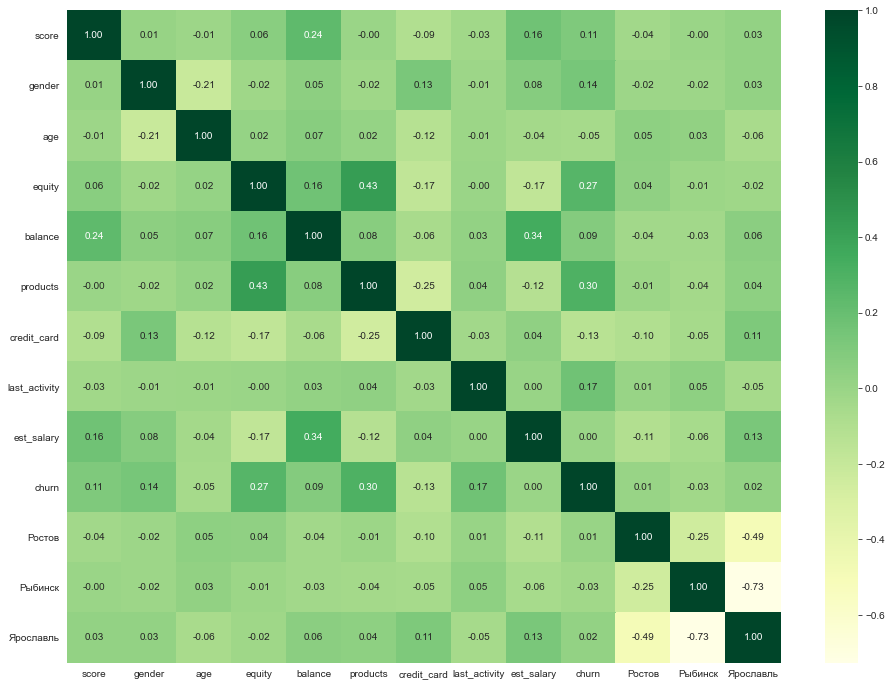

In [49]:
#построим матрицу корреляции
fig, ax = plt.subplots(figsize=(16,12))

#исключаем из матрицы столбец userid
sns.heatmap(data=df_bank.drop(columns=['userid']).corr(),
           annot=True, cmap='YlGn', fmt='.2f')

plt.show()

Судя по коэффициентам корреляции, сильной линейной взаимосвязи между признаками не наблюдается.

Можно отметить следующие моменты:

- умеренная сила связи по шкале Чеддока между признаками:
    - `products` - `equity`: наибольшее значение, равное 0.43, имеет коэффициент корреляции между количеством банковских продуктов `products` и количеством баллов собственности `equity`;
    - `est_salary` - `balance`: есть положительная взаимосвязь между размером зарплаты `est_salary` и остатком на счёте `balance`, r = 0.34;
    - `churn` - `products`: отток клиентов, имеет умеренную положительную взаимосвязь с количеством банковских продуктов products, r = 0.30;
- слабая сила связи по шкале Чеддока между признаками:
    - `churn` - `equity` и `churn` - `last_activity`: отток клиентов имеет слабую положительную взаимосвязь  с количеством баллов собственности `equity` - 0.27 и активностью клиента `last_activity` - 0.17;
    - `products` - `credit_card`: в отрицательную сторону наибольшее отклонение коэффициента корреляции отмечено для связи количества продуктов `products` и наличием кредитной карты `credit_card`, то есть при увеличении количества продуктов, снижается вероятность наличия кредитной карты у клиента.

__Оценка силы связи по величине корреляции, шкала Чеддока:__


| Коэффицент корреляции   | Сила связи    |
|:-----------------------:|:--------------|
|         0.1 - 0.3       | слабая        |
|         0.3 - 0.5       | умеренная     |
|         0.5 - 0.7       | заметная      |
|         0.7 - 0.9       | высокая       |
|         0.9 - 1.0       | весьма высокая|

<a id="resume_preprocessing"></a>

### Итоги по разделу предобработки данных

**На этапе предобработки данных:**

- привели наименования столбцов к общему виду; 
- преобразовали тип данных в столбцах `score` и `age`, заменили float на int;
- определили долю пропусков в столбцах;
- проверили датасет на наличие дубликатов;
- обнаружили дубликаты в столбце `userid`, предположили природу их появления;
- построили гистограммы, определили наличие выбросов.
- преобразовали значения в столбце `gender` к числовому виду;
- добавили столбцы `age_category`, `balance_category` и `salary_category` для выделения категорий по возрасту, остатку на счёте и размеру зарплаты соответственно.
- добавили столбцы с наименованием городов, для включения их в матрицу корреляции
- построили матрицу корреляции, отметили отсутствие сильных взаимосвязей между признаками, а также наличие слабых взаимосвязей между некоторыми параметрами.


<a id="eda"></a>

## Исследовательский анализ данных

<a id="city_eda"></a>

### Распределение клиентов по городам

Посмотрим, сколько клиентов обслуживается в каждом из городов.

In [50]:
#группируем по городу и выводим количество клиентов
d_city = (df_bank.groupby('city', as_index=False)
          .agg(clients=('city', 'count'))
          .sort_values(by='clients', ascending=False)
         )
display(d_city)

city  clients
2  Ярославль     5888
1    Рыбинск     2695
0     Ростов     1417

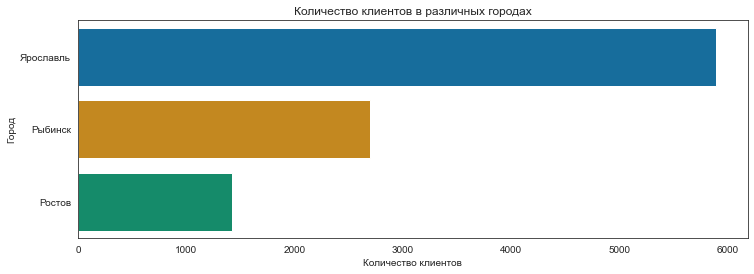

In [51]:
#строим график по количеству клиентов в городах
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(data=df_bank, y='city',
              order=df_bank['city'].value_counts().index
             )
ax.set_title('Количество клиентов в различных городах')
ax.set_xlabel('Количество клиентов')
ax.set_ylabel('Город')


plt.show()

Наибольшее количество клиентов обслуживаются в Ярославле.

Дополнительно проверим распределение по полу клиента в каждом из городов.

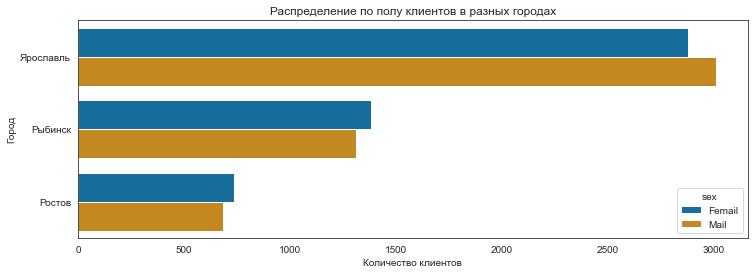

In [52]:
#строим график по количеству клиентов в городах
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(data=df_bank, y='city', hue='gender',
              order=df_bank['city'].value_counts().index
             )
ax.set_title('Распределение по полу клиентов в разных городах')
ax.set_xlabel('Количество клиентов')
ax.set_ylabel('Город')
plt.legend(title='sex', labels=['Femail', 'Mail'])

plt.show()

В Ярославле клиентов мужчин больше, чем женщин, а в Рыбинске и Ростове наоборот, женщин чуть больше.

<a id="gender_eda"></a>

### Распределение клиентов по полу

Проверим, кого больше среди клиентов, мужчин или женщин.

In [53]:
#выводим количество мужчин (1) и женщин (0)
print(df_bank['gender'].value_counts())

1    5005
0    4995
Name: gender, dtype: int64


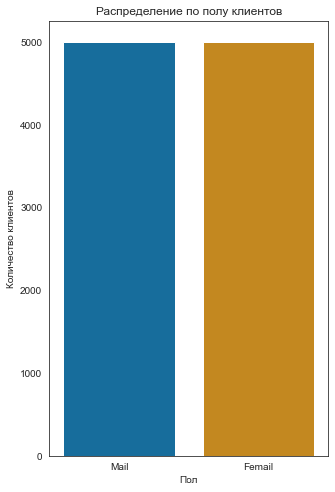

In [54]:
#строим график по количеству клиентов в городах
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(data=df_bank, x='gender',
              order=df_bank['gender'].value_counts().index
             )
ax.set_title('Распределение по полу клиентов')
ax.set_xlabel('Пол')
ax.set_ylabel('Количество клиентов')
ax.set_xticklabels(['Mail', 'Femail'])

plt.show()

Среди клиентов практически одинаковое количество мужчин и женщин.

<a id="age_eda"></a>

### Возраст клиентов

Ранее мы выделили возрастные категории, посмотрим сколько клиентов попадает в каждую их этих категорий.

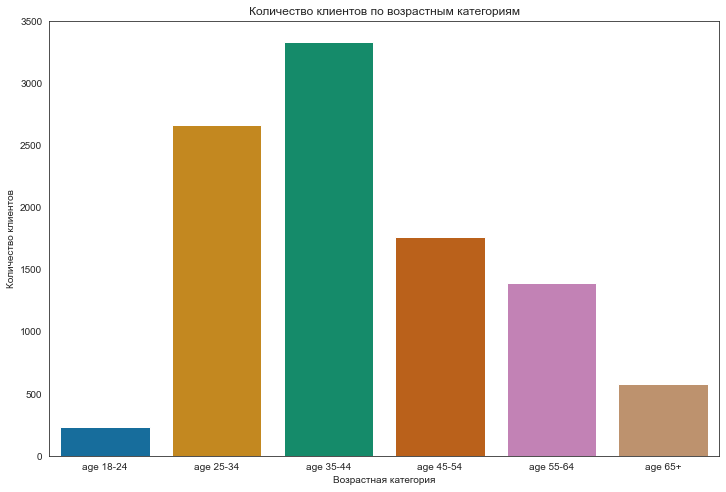

In [55]:
#график распределения по возрастным категориям
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=df_bank, x='age_category',
#              order=df_bank['age_category'].value_counts().index
               order=df_bank[~df_bank['age'].isna()].sort_values('age_category')['age_category'].unique()
             )
ax.set_title('Количество клиентов по возрастным категориям')
ax.set_xlabel('Возрастная категория')
ax.set_ylabel('Количество клиентов')


plt.show()

Среди клиентов не очень много молодежи до 25 лет. Наибольшее количество клиентов в возрасте от 35 до 44 лет.

Рассмотрим, как различается распределение по возрасту для мужчин и женщин.

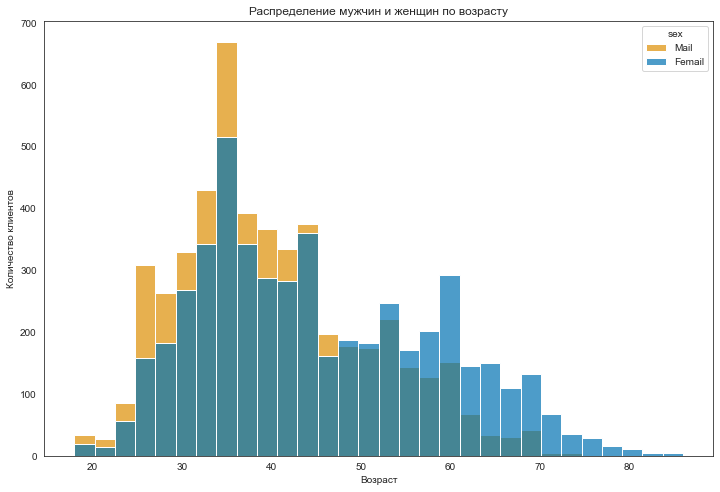

In [56]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data = df_bank[~df_bank['age'].isna()], x='age', bins=30, hue='gender', multiple='layer', alpha=0.7)

ax.set_title('Распределение мужчин и женщин по возрасту')
ax.set_ylabel('Количество клиентов')
ax.set_xlabel('Возраст')
plt.legend(title='sex', labels=['Mail', 'Femail'])
plt.show()

До определённого возраста, примерно до 45 лет, количество мужчин среди клиентов превышает количество женщин, а затем уже женщины опережают мужчин по количеству, и этот разрыв резко увеличивается при приближении к 60 годам.

    
<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> Отличное использование нормализованной гистограммы
</div>

Выведем эту же информацию в другом виде.

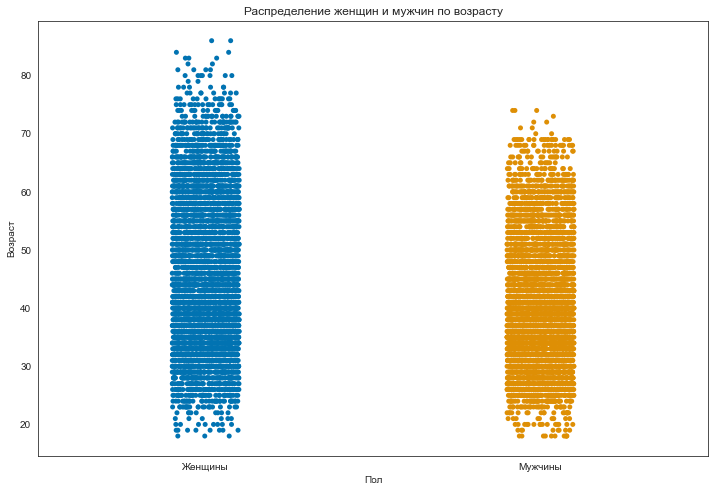

In [57]:
#распределенине мужчин и женщин по возрасту
fig, ax = plt.subplots(figsize=(12,8))
sns.stripplot(data = df_bank[~df_bank['age'].isna()], x='gender', y='age')
ax.set_xticklabels(['Женщины', 'Мужчины'])
ax.set_xlabel('Пол')
ax.set_ylabel('Возраст')
ax.set_title('Распределение женщин и мужчин по возрасту')

plt.show()

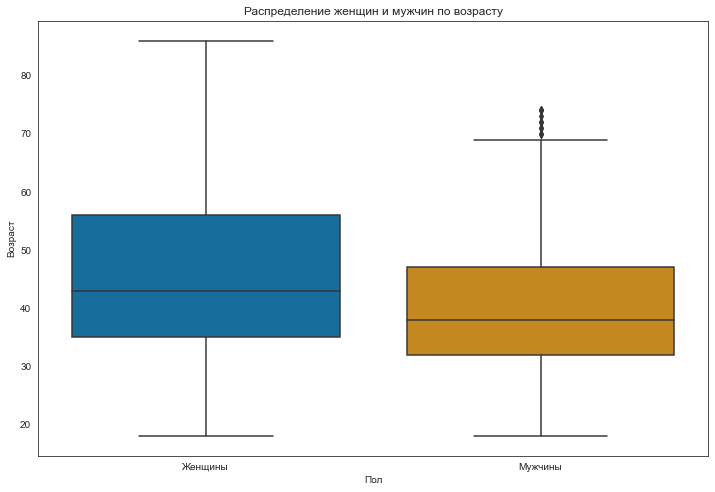

In [58]:
#распределенине мужчин и женщин по возрасту
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data = df_bank[~df_bank['age'].isna()], x='gender', y='age')
ax.set_xticklabels(['Женщины', 'Мужчины'])
ax.set_xlabel('Пол')
ax.set_ylabel('Возраст')
ax.set_title('Распределение женщин и мужчин по возрасту')

plt.show()

По данным Росстата в среднем по России в 2022 году продолжительность жизни женщин составляет 77,8 лет, а мужчин - 67,6 лет. Эта тенденция большей продолжительности жизни женщин по сравнению с мужчинами отражена и среди клиентов нашего банка.

Источник: статья на [РБК](https://www.rbc.ru/economics/26/03/2023/641f04989a7947c736e37524)

<a id="equity_eda"></a>

### Наличие собственности у клиентов

Выведем количество клиентов в разрезе количества баллов собственности:

In [59]:
#группируем клиентов по количеству баллов собственности
df_grouped_by_equity = (df_bank.groupby('equity', as_index=False)
                        .agg(clients=('equity', 'count'))
                       )                        
   

In [60]:
#выводим количество клиентов в разрезе количества баллов собственности
display(df_grouped_by_equity
        .style
        .background_gradient(cmap='Greens', subset=['clients']))

Отобразим на графике распределение клиентов в разрезе баллов собственности.

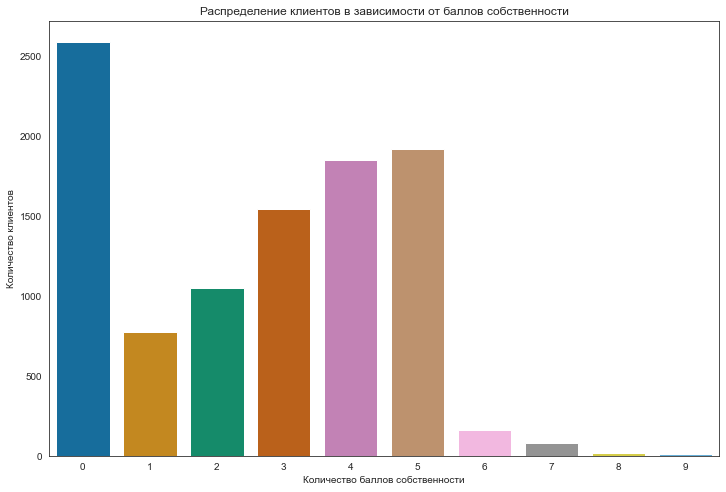

In [61]:
#количество клиентов с разным количеством баллов собственности
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=df_bank, x='equity')
ax.set_title('Распределение клиентов в зависимости от баллов собственности')
ax.set_xlabel('Количество баллов собственности')
ax.set_ylabel('Количество клиентов')

plt.show()

Больше всего клиентов, у которых отсутствует собственность. Количество клиентов с баллами собственности от одного до пяти увеличивается с каждым баллом собственности, а затем резко падает для 6 и более баллов.

Выделим в отдельную категорию тех клиентов, у которых 6 и более баллов собственности, и построим круговыю диаграмму, чтобы оценить доли клиентов с различным количеством собственности.

Так как 

In [62]:
#выделим в отдельную категорию клиентов, у которых 6 и более баллов собственности
clients_sum = df_grouped_by_equity.loc[df_grouped_by_equity['equity']>5, 'clients'].sum()
new_row = pd.DataFrame({'equity' : '6 or more', 'clients' : [clients_sum]})
df_grouped_by_equity = df_grouped_by_equity.query('equity <=5')
df_grouped_by_equity = pd.concat([df_grouped_by_equity, new_row])
df_grouped_by_equity = df_grouped_by_equity.sort_values(by='clients', ascending=False)

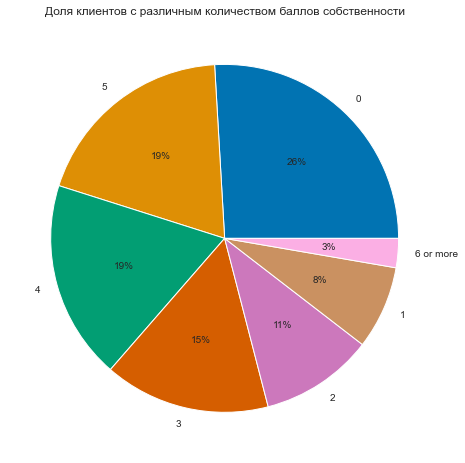

In [63]:
#выводим диаграмму
fig, ax = plt.subplots(figsize=(10,8))
df_grouped_by_equity['clients']\
        .plot(kind='pie', autopct='%1.0f%%', labels=df_grouped_by_equity['equity'])
ax.set_title('Доля клиентов с различным количеством баллов собственности')
ax.set_ylabel('')

plt.show()

Чуть более четверти от общего количества клиентов не имеют собственности, а более половины клиентов имеют от 3 до 5 баллов собственности.

<a id="balance_eda"></a>

### Баланс на счёте

Ранее мы выделели категории клиентов в зависимост от остатка на счёте. Посмотрим, как распределяются клиенты по этит категориям.

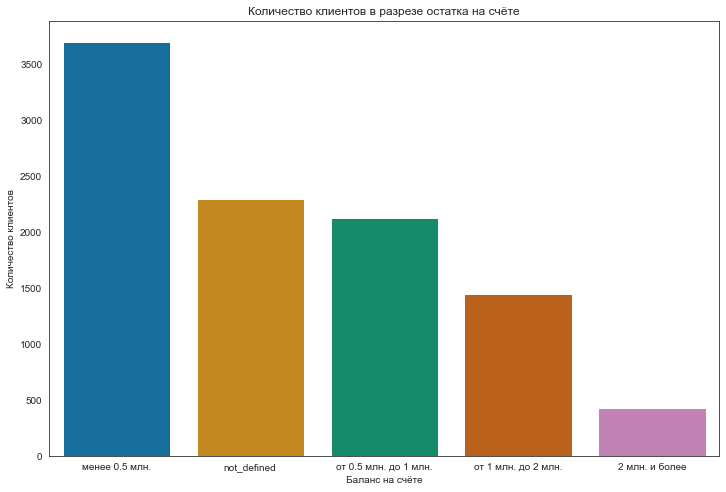

In [64]:
#график распределения по категориям в зависимости от баланса на счёте
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=df_bank, x='balance_category',
               order=df_bank['balance_category'].value_counts().index
             )
ax.set_title('Количество клиентов в разрезе остатка на счёте')
ax.set_xlabel('Баланс на счёте')
ax.set_ylabel('Количество клиентов')


plt.show()

Есть большое количество клиентов, почти четверть от общего числа, для которых отсутствуют данные об остатке на счетах. Попробуем определить, от чего может зависеть отсутствие информации о балансе.

In [65]:
df_bank['balance_not_defined'] = df_bank['balance'].isna()

__Отсутствие данных о балансе: есть ли взаимосвязь с признаком оттока__

Сначала проверим, не может ли быть так, что баланс не указан для тех клиентов, которые уже ушли из банка. 

In [66]:
#сколько всего клиентов ушло
clients_out_total = len(df_bank[df_bank['churn']==1])

#сколько клиентов ушло, и при этом у них не указан баланс
clients_out_without_balance = len(df_bank[(df_bank['churn']==1) & (df_bank['balance'].isna())])

print(f"Процент клиентов, у которых не указан баланс, среди ушедших: {clients_out_without_balance / clients_out_total :.2%}")

Процент клиентов, у которых не указан баланс, среди ушедших: 0.71%


Менее чем у одного процента среди ушедших из банка клиентов отсутствуют данные о балансе на счёте. То есть не подтверждается идея о том, что баланс не заполнен для ушедших клиентов.

__Отсутствие данных о балансе: есть ли взаимосвязь с наличием кредитной карты__

Проверим, есть ли взаимосвязь между отсутствием информации о балансе и наличием кредитной карты у клиента.

При рассмотрении столбца [`credit_card`](#credit_card) мы выяснили, что 68% клиентов имеют кредитную карту.

Сравним долю клиентов, имеющих кредитную карту, среди тех у кого указано значение баланса на счёте и тех, у кого баланс не указан.

In [67]:
#доля клиентов, имеющих кредитную карту, среди тех у кого указан и не указан баланс
print('Доля клиентов, имеющих кредитную карту, среди тех у кого указан баланс и у кого не указан баланс')
display(df_bank.groupby('balance_not_defined', as_index=False).agg({'credit_card' : 'mean'})
        .style
        .format({'credit_card': '{:.1%}'})
                )

Доля клиентов, имеющих кредитную карту, среди тех у кого указан баланс и у кого не указан баланс


Среди клиентов, имеющих кредитную карту, повыше процент тех, у кого неизвестен баланс счёта.

Рассмотрим долю и количество клиентов, у которых не указан баланс, в разрезе количества продуктов и наличия кредитной карты.

In [68]:
print('''Доля и количество клиентов, у которых не указан баланс,
в разрезе количества продуктов и наличия кредитной карты:''')
display(df_bank.groupby(['products', 'credit_card'], as_index=False)
        .agg(procent_balance_not_defined=('balance_not_defined', 'mean'),
             count_balance_not_defined=('balance_not_defined', 'sum'))
        .style
        .format({'procent_balance_not_defined': '{:.1%}'})
                )

Доля и количество клиентов, у которых не указан баланс,
в разрезе количества продуктов и наличия кредитной карты:


Чем больше у клиента продуктов, тем с меньшей вероятностью для него отсутствуют данные о балансе на счёте.
Самая высокая доля клиентов, у которых не указан баланс, среди тех, кто пользуется только одним продуктом.

При этом не выявляется однозначная взаимосвязь, между наличием кредитной карты и отсутствием данных о балансе на счёте. 

Одним из банковских продуктов клиента может быть кредит наличными. Тогда получается, что при наличии кредитного продукта, и если у клиента всего один продукт, то у него может отсутствовать остаток собственных средст, а есть только заёмные средства, что приводит к отсутствию информации о балансе на счёте.

__Отсутствие данных о балансе: нулевой остаток__

Можно предположить, что данные о балансе не заполнены в тех случаях, когда у клиента нулевой остаток, или когда его собственные средства меньше, чем заёмные.

Выведем клиентов с нулевым остатком:

In [69]:
print('Список клиентов с нулевым остатком на счёте:')
display(df_bank[df_bank['balance']==0])

Список клиентов с нулевым остатком на счёте:


userid  score       city  gender  age  equity  balance  products  \
3900  179831    730  Ярославль       1   18       0     0.00         2   
6757  148456    813  Ярославль       1   20       2     0.00         2   

      credit_card  last_activity  est_salary  churn age_category  \
3900            1              1    64548.33      0    age 18-24   
6757            1              0    23876.51      0    age 18-24   

     balance_category salary_category  Ростов  Рыбинск  Ярославль  \
3900   менее 0.5 млн.            <100       0        0          1   
6757   менее 0.5 млн.            <100       0        0          1   

      balance_not_defined  
3900                False  
6757                False

Выведем распределение по остатоку на счёте для тех, у кого баланс менее 100000 рублей.

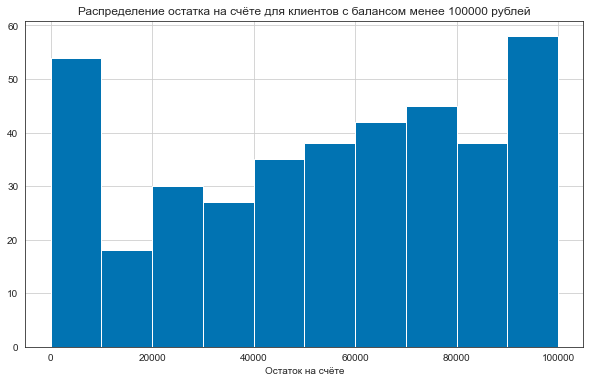

In [70]:
#гистограмма баланса на счёте до 100000 рублей
fig, ax = plt.subplots(figsize=(10,6))
df_bank[df_bank['balance']<100000]['balance'].hist()
ax.set_title('Распределение остатка на счёте для клиентов с балансом менее 100000 рублей')
ax.set_xlabel('Остаток на счёте')
plt.show()

В датасете содержится всего два клиента, у которых нулевой баланс.

В распределении по остаткам на счёте, нет каких-то выбросов в районе минимальных значений, которые могли бы говорить, например, о том, что в банке необходимо всегда держать минимальный остаток не менее какой-то суммы.

Можно предположить, что у клиентов, у которых не заполнено поле `balance`, реальное значение остатка может равняться нулю, либо сумма заёмных средств превышает сумму собственных, что соответственно уводит баланс в отрицательную зону.

Так как точной информации у нас нет, то оставим для таких записей значение баланса `not_defined`, а в голове будем держать предположение о нулевом либо отрицательном остатке. 

<a id="products_eda"></a>

### Количество банковских продуктов у клиента

Посмотрим распределение клиентов в разрезе количества банковских продуктов у одного клиента.

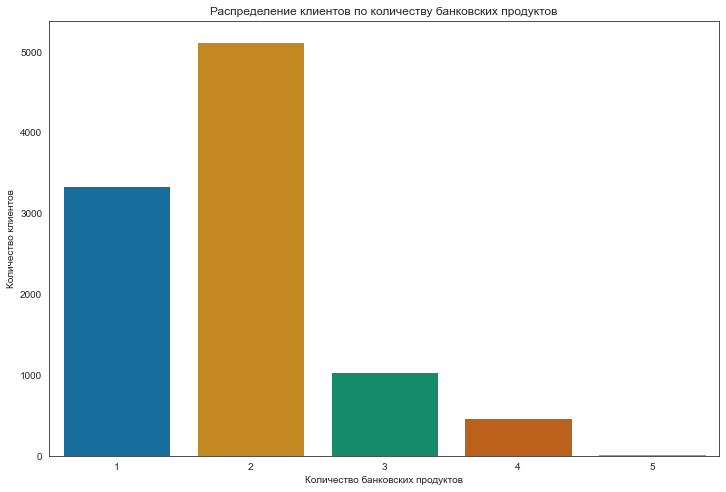

In [71]:
#график распределения клиентов в разрезе количества банковских продуктов 
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=df_bank, x='products',
#               order=df_bank['balance_category'].value_counts().index
             )
ax.set_title('Распределение клиентов по количеству банковских продуктов')
ax.set_xlabel('Количество банковских продуктов')
ax.set_ylabel('Количество клиентов')


plt.show()

Больше всего клиентов, около половины от общего числа, имеют по два продукта, а треть клиентов - по одному продукту.  Более трёх продуктов имеет незначительная часть клиентов, объединим их в одну категорию: тех, у кого 3 и более продуктов. 

In [72]:
#добавляем столбец с категориями по количеству продуктов: 1 продукт, 2 продукта, 3 и более продуктов.
df_bank['products_n'] = df_bank['products'].apply(lambda x: '1' if x==1 else '2' if x==2 else '3 and more')

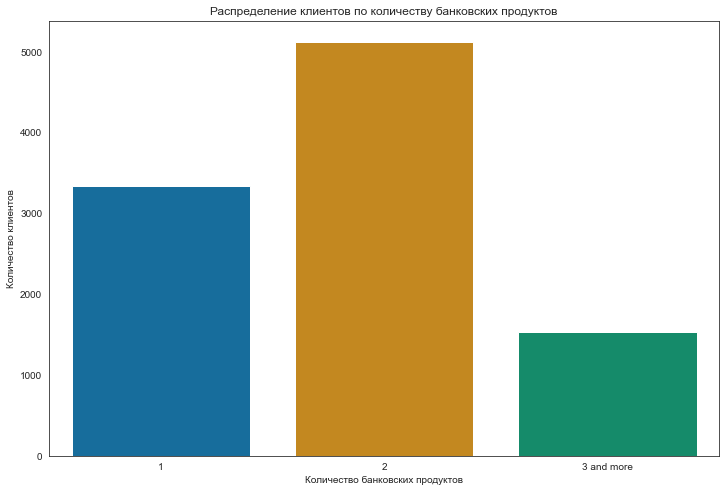

In [73]:
#график распределения клиентов в разрезе количества банковских продуктов 
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=df_bank, x='products_n',
               order=df_bank['products_n'].sort_values().unique()
             )
ax.set_title('Распределение клиентов по количеству банковских продуктов')
ax.set_xlabel('Количество банковских продуктов')
ax.set_ylabel('Количество клиентов')


plt.show()

<a id="credit_card_eda"></a>

### Наличие кредитной карты

Выведем информацию о том, сколько клиентов имеют кредитную карту.

In [74]:
cred_card_grouped = df_bank.groupby('credit_card', as_index=False).agg(count=('credit_card','count'))
cred_card_grouped['percent'] = cred_card_grouped['count'] / cred_card_grouped['count'].sum()

display(cred_card_grouped
       .style
       .format({'percent' : '{:.2%}'})
       )

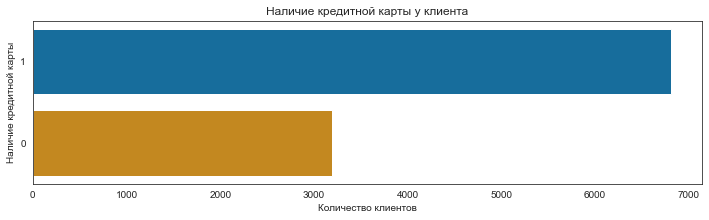

In [75]:
#строим график в разрезе наличия кредитной карты
fig, ax = plt.subplots(figsize=(12,3))
sns.countplot(data=df_bank, y='credit_card',
              order=df_bank['credit_card'].value_counts().index
             )
ax.set_title('Наличие кредитной карты у клиента')
ax.set_xlabel('Количество клиентов')
ax.set_ylabel('Наличие кредитной карты')


plt.show()

Кредитная карта есть у двух третей клиентов.

Посмотрим, клиенты каких возрастов чаще пользуются кредитной картой.

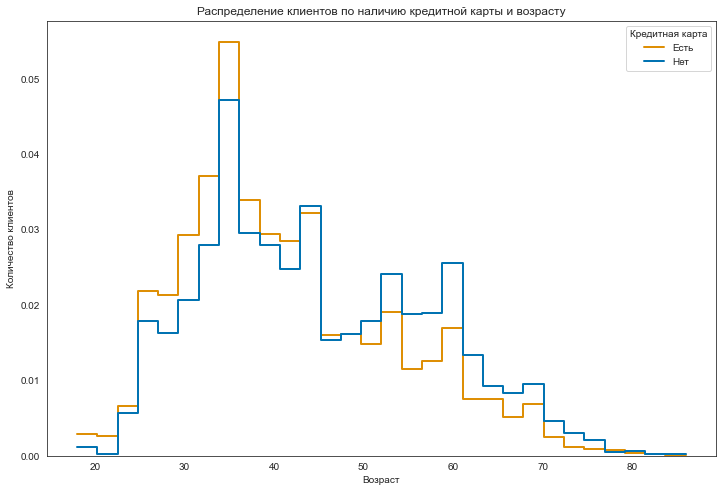

In [76]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data = df_bank.dropna(subset=['age']), x='age', bins=30, hue='credit_card', 
             multiple='layer', alpha=0.3,
             stat='density',
             element='step',
             linewidth=2,
             fill=False,
             common_norm=False
            )

ax.set_title('Распределение клиентов по наличию кредитной карты и возрасту')
ax.set_ylabel('Количество клиентов')
ax.set_xlabel('Возраст')
plt.legend(title='Кредитная карта', labels=['Есть', 'Нет'])
plt.show()

Различия не очень существенны, до 40 лет клиенты более склонны пользоваться кредитной картой, чем в более старшем возрасте.

<a id="last_activity_eda"></a>

### Активность клиента

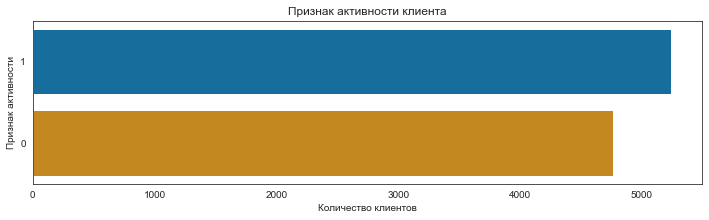

In [77]:
#строим график в разрезе активности клиента
fig, ax = plt.subplots(figsize=(12,3))
sns.countplot(data=df_bank, y='last_activity',
              order=df_bank['last_activity'].value_counts().index
             )
ax.set_title('Признак активности клиента')
ax.set_xlabel('Количество клиентов')
ax.set_ylabel('Признак активности')


plt.show()

Активных клиентов чуть больше, чем неактивных.

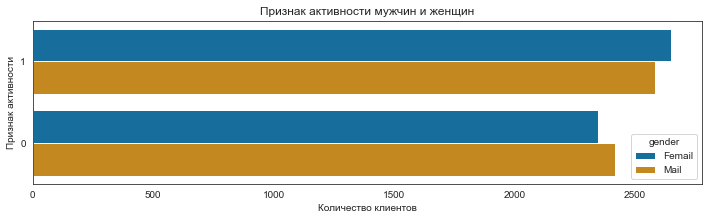

In [78]:
#строим график в разрезе активности клиента и пола
fig, ax = plt.subplots(figsize=(12,3))
sns.countplot(data=df_bank, y='last_activity',
              hue='gender',
              order=df_bank['last_activity'].value_counts().index
             )
ax.set_title('Признак активности мужчин и женщин')
ax.set_xlabel('Количество клиентов')
ax.set_ylabel('Признак активности')
plt.legend(title='gender', labels=['Femail', 'Mail'])

plt.show()

Женщины более активные клиенты банка, чем мужчины.

<a id="salary_eda"></a>

### Заработная плата

Будем рассматривать зарплаты до 500000 рублей. Посмотрим как распределяются размеры зарплат в зависимости от возраста и пола.

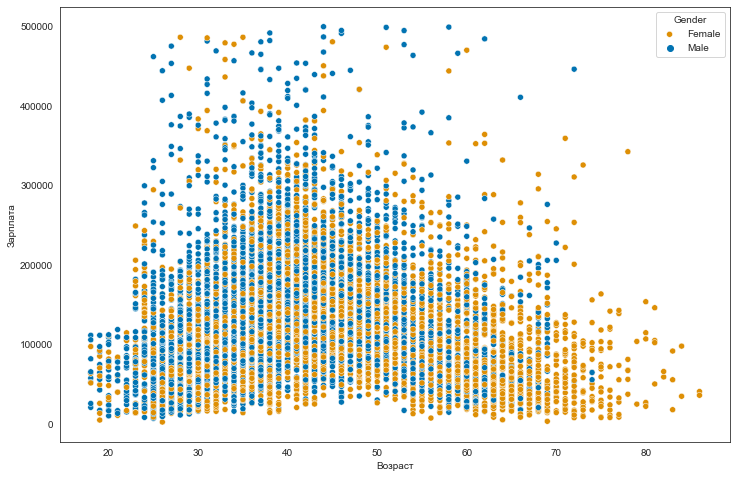

In [79]:
#распределение зарплаты по возрасту и полу
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data = df_bank[df_bank['est_salary']<500000], y='est_salary', x='age',
                hue='gender', hue_order=[1,0])
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
ax.set_ylabel('Зарплата')
ax.set_xlabel('Возраст')

plt.show()

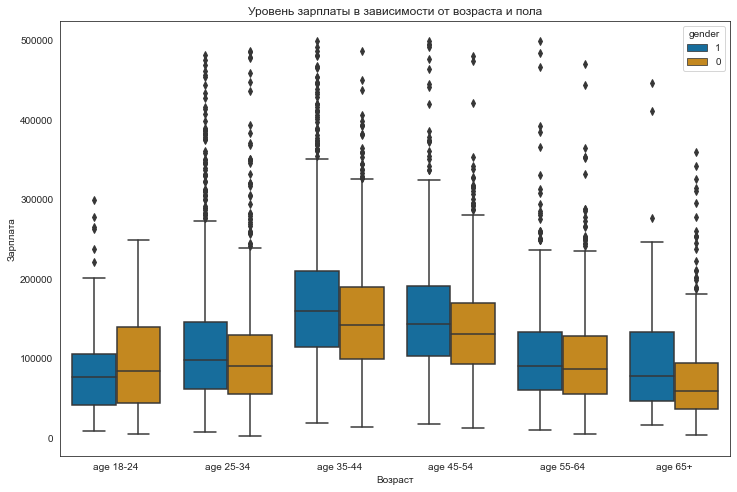

In [80]:
#распределение зарплаты по возрасту и полу
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data = df_bank[df_bank['est_salary']<500000], y='est_salary', x='age_category',
                hue='gender', hue_order=[1,0],
           order=df_bank[~df_bank['age'].isna()].sort_values('age_category')['age_category'].unique())
#plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
ax.set_ylabel('Зарплата')
ax.set_xlabel('Возраст')
ax.set_title('Уровень зарплаты в зависимости от возраста и пола')

plt.show()

У молодежи зарплаты поменьше, верхняя граница около 100000 рублей. В среднем возрасте большее количество мужчин имеют более высокую зарплату.

<a id="churn_eda"></a>

### Признак оттока клиентов

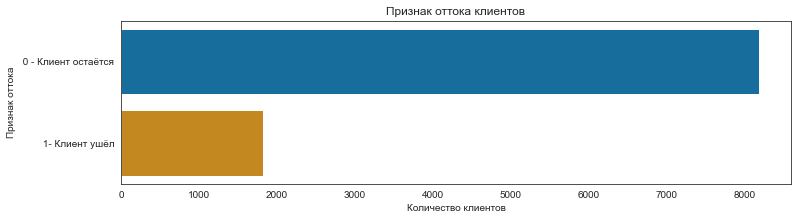

In [81]:
#строим график в разрезе признака оттока
fig, ax = plt.subplots(figsize=(12,3))
sns.countplot(data=df_bank, y='churn',
              order=df_bank['churn'].value_counts().index
             )
ax.set_title('Признак оттока клиентов')
ax.set_xlabel('Количество клиентов')
ax.set_ylabel('Признак оттока')

ax.set_yticklabels([' 0 - Клиент остаётся', ' 1- Клиент ушёл'])

plt.show()

Определим средний уровень оттока клиентов.

In [82]:
#сохраняем в переменную средний уровень оттока по всей выборке
avg_churn_level = df_bank['churn'].mean()

print(f'\033[1m{"Средний уровень оттока клиентов банка: "}{avg_churn_level:.1%}\033[0m')

Средний уровень оттока клиентов банка: 18.2%


Среди всех клиентов банка средний уровень оттока составляет `18,2%`. На следующем этапе исследуем, от каких параметров зависит уровень оттока.

<a id="resume_eda"></a>

### Выводы по разделу "Исследовательский анализ"

Мы обнаружили следующее:

- Больше всего клиентов находятся в Ярославле, и в этом городе клиентов мужчин больше, чем женщин. В Рыбинске и Ростове наоборот, женщин чуть больше чем мужчин;
- Среди клиентов практически одинаковое количество мужчин и женщин: 5005 мужчин и 4995 женщин;
- Наибольшее количество клиентов в возрасте от 35 до 44 лет, а наименьшее - от 18 до 25 лет. 
- До 45 лет количество мужчин среди клиентов превышает количество женщин, а затем уже женщины опережают мужчин по количеству, и этот разрыв резко увеличивается при приближении к 60 годам;
- Четверть от общего количества клиентов не имеют собственности, а более половины клиентов имеют от 3 до 5 баллов собственности;
- Для 23% клиентов отсутствует информаци о балансе на счёте. По итога анализа выдвинули предположение, что у клиентов, у которых не заполнено поле balance, реальное значение остатка может равняться нулю, либо сумма заёмных средств превышает сумму собственных, что соответственно уводит баланс в отрицательную зону;
- Более половины от общего числа клиентов имеют по два продукта, а треть клиентов - по одному продукту;
- Кредитная карта есть у двух третей клиентов. Клиенты до 40 лет более склонны пользоваться кредитной картой, чем в более старшем возрасте;
- Активных клиентов чуть больше, чем неактивных. Среди активных клиентов, по количеству, женщины немного превосходят мужщин;
- Зарплаты поменьше у молодых клиентов, до 25 лет верхняя граница редко превышает 100 тысяч рублей. В среднем возрасте большее количество мужчин имеют более высокую зарплату;
- Средний уровень оттока клиентов банка составляет 18.2%.


<a id="churn_rating"></a>

## Влияние различных факторов на отток клиентов

Выведем коэффициенты коррелляции оттока с различными признаками из нашего датасета.

Корреляция оттока с различными факторами:

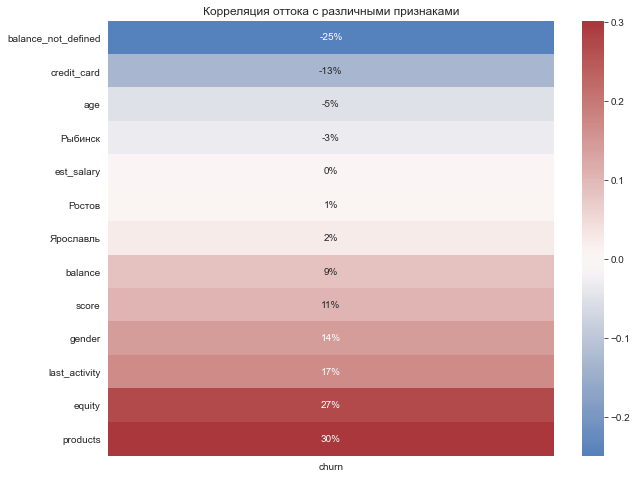

In [83]:
#выбираем из матрицы корреляции столбец с признаком оттока
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_bank.corr().loc[:,['churn']]
            .drop(['churn', 'userid'])
            .sort_values('churn'),
            annot=True,
            fmt=".0%",
            cmap="vlag",
            center=0
           )
ax.set_title('Корреляция оттока с различными признаками')


plt.show()

__Оценка силы связи по величине корреляции, шкала Чеддока:__


| Коэффицент корреляции   | Сила связи    |
|:-----------------------:|:--------------|
|         0.1 - 0.3       | слабая        |
|         0.3 - 0.5       | умеренная     |
|         0.5 - 0.7       | заметная      |
|         0.7 - 0.9       | высокая       |
|         0.9 - 1.0       | весьма высокая|

Коэффициент корреляции отклоняется в положительную сторону для `products`, `equity`, `last_activity`, `gender`, `score` и `balance`. При этом по шкале Чеддока теснота связи с количеством продуктов `умеренная`, а с остальными признаками - `слабая`.

`Слабая` отрицательная взаимосвязь обнаруживается с признаком `balance_not_defined`, а также с наличием кредитной карты `credit_card`, то есть клиенты у которых не определён баланс или есть крединтая карта менее склонны уходить. 

Рассмотрим зависимость ухода клиента от каждого из факторов.

<a id="functions_churn"></a>

### Определение функций для сравнения признаков в разрезе оттока клиентов

Создадим функцию, которая будет строить гистограмму оттока клиентов в разрезе какого-либо из факторов.

__Функция для сравнения гистограмм__

In [84]:
def hist_compare(df, column, h_hue, vert_lines=[], norm=True):
    
    fig, ax = plt.subplots(figsize=(14,8))
    
    if norm:
        common_norm=False
    else:
        common_norm=True
        
    sns.kdeplot(data=df, x=column, hue=h_hue, common_norm=common_norm, linewidth=3)

    # Получаем объекты Line2D для каждой кривой плотности
    lines = plt.gca().get_lines()

    # Получаем значения x и y для каждой кривой плотности
    x1, y1 = lines[0].get_data()
    x2, y2 = lines[1].get_data()

    # Интерполируем значения y для каждой кривой плотности
    f1 = np.interp(x2, x1, y1)
    f2 = y2

    # Находим значения x, которые соответствуют точкам пересечения
    intersection_points = x2[np.argwhere(np.diff(np.sign(f1 - f2)) != 0)]

    # Получаем текущие пределы оси Y
    ymin, ymax = plt.ylim()

    # Строим вертикальные линии в точках пересечения
    for point in intersection_points[1:]:
        plt.axvline(point, color='orange', linestyle='--', linewidth=1.5)
        plt.text(point, ymax+ymax/40, f'{round(point[0])}', ha='center', va='top', fontsize=10)

    for x_point in vert_lines:
        plt.axvline(x_point, color='red', linestyle='--', linewidth=1.5)
        plt.text(x_point, ymax++ymax/35, f'{round(x_point)}', ha='center', va='top', fontsize=10)
        
    ax.set_title(f'Распределение ушедших и оставшихся клиентов по признаку {column}', y=1.1)    
    plt.show()


__Функция для сравнения оттока в разрезе категориальных признаков__

In [85]:
def churn_for_category(df, column):
    df_churn_ratio = (df.groupby([column, 'churn'], as_index=False)
                  .agg(clients=('churn', 'count'))
                 )

    df_churn_ratio['total_clients_by_category'] = (df_churn_ratio
                                               .groupby(column)['clients']
                                               .transform(sum)
                                              )

    df_churn_ratio['proportion'] = df_churn_ratio['clients'] / df_churn_ratio['total_clients_by_category']

    df_churn_ratio = df_churn_ratio.sort_values(by=['total_clients_by_category', 'proportion'],
                                                ascending=[False, True])
    
    fig, ax = plt.subplots(figsize=(12,8))

    ax = sns.barplot(x=column, y='total_clients_by_category', data=df_churn_ratio[df_churn_ratio['churn']==1], color='green', alpha=0.7,
                    order=df_churn_ratio[df_churn_ratio['churn']==1].sort_values(by='total_clients_by_category', ascending=False)[column])
    ax = sns.barplot(x=column, y='clients', data=df_churn_ratio[df_churn_ratio['churn']==1], color='red', alpha=.9,
                    order=df_churn_ratio[df_churn_ratio['churn']==1].sort_values(by='total_clients_by_category', ascending=False)[column])

    ax.set_ylabel('Количество клиентов')
    ax.set_xlabel(column)
    ax.set_title(f'Количество ушедших и оставшихся клиентов в разрезе признака {column}')

    plt.show()
    
    fig=px.bar(df_churn_ratio, 
           y='proportion',
           x=column,
           color='churn',
           color_continuous_scale='rdylgn_r',
           title=f'Уровень оттока клиентов в разрезе признака {column}',
           text=round(df_churn_ratio['proportion']*100, 1).apply(lambda x: '{0}%'.format(x))
          )
    
    fig.update_layout(
#        legend_title='Категории заведений',
        yaxis_title='Процент ушедших и оставшихся клиентов',
        xaxis_title=column,
        width=800,
        height=700
    )

    fig.add_hline(y=avg_churn_level, line_width=3, line_dash="dash", line_color="yellow")

    fig.show()

    display(df_churn_ratio)

__Функция для сравнения оттока в разрезе категориальных признаков с сортировкой по возрастанию уровня оттока__

In [86]:
def churn_for_category_sort_by_proportion(df, column):
    df_churn_ratio = (df.groupby([column, 'churn'], as_index=False)
                  .agg(clients=('churn', 'count'))
                 )

    df_churn_ratio['total_clients_by_category'] = (df_churn_ratio
                                               .groupby(column)['clients']
                                               .transform(sum)
                                              )

    df_churn_ratio['proportion'] = df_churn_ratio['clients'] / df_churn_ratio['total_clients_by_category']

    df_churn_ratio = df_churn_ratio.sort_values(by=['proportion'], ascending=True)
    
    fig, ax = plt.subplots(figsize=(12,8))

    ax = sns.barplot(x=column, y='total_clients_by_category', data=df_churn_ratio[df_churn_ratio['churn']==1], color='green', alpha=0.7,
                    order=df_churn_ratio[df_churn_ratio['churn']==1].sort_values(by='total_clients_by_category', ascending=False)[column])
    ax = sns.barplot(x=column, y='clients', data=df_churn_ratio[df_churn_ratio['churn']==1], color='red', alpha=.9,
                    order=df_churn_ratio[df_churn_ratio['churn']==1].sort_values(by='total_clients_by_category', ascending=False)[column])


    ax.set_ylabel('Количество клиентов')
    ax.set_xlabel(column)
    ax.set_title(f'Количество ушедших и оставшихся клиентов в разрезе признака {column}')

    plt.show()
    
    fig=px.bar(df_churn_ratio, 
           y='proportion',
           x=column,
           color='churn',
           color_continuous_scale='rdylgn_r',
           title=f'Уровень оттока клиентов в разрезе признака {column}',
           text=round(df_churn_ratio['proportion']*100, 1).apply(lambda x: '{0}%'.format(x))
          )
    
    fig.update_layout(
#        legend_title='Категории заведений',
        yaxis_title='Процент ушедших и оставшихся клиентов',
        xaxis_title=column,
        width=800,
        height=700
    )

    fig.add_hline(y=avg_churn_level, line_width=3, line_dash="dash", line_color="yellow")

    fig.show()

    display(df_churn_ratio)

<a id="churn_eda"></a>

### Зависимость оттока клиентов от баллов кредитного скоринга

Построим распределение плотности в зависимости от баллов кредитного скоринга, для ушедших и оставшихся клиентов.

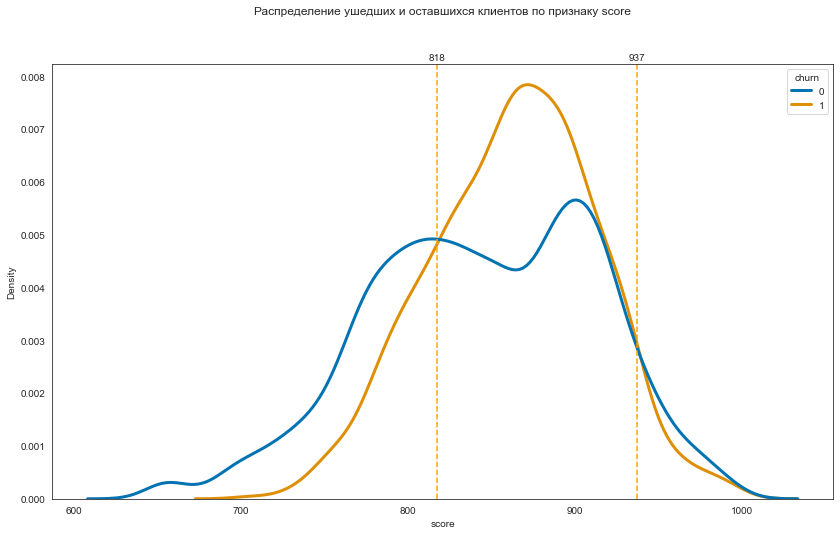

In [87]:
hist_compare(df_bank, 'score', 'churn')

Клиенты, у которых количество баллов кредитного скоринга находится в диапазоне от 818 до 937 баллов более склонны уходить. После 900 баллов линии распределения идут рядом друг с другом, поэтому можно сузить диапазон, в котором находятся более "отточные" клиенты.

Выведем тот же график с дополнительными линиями.

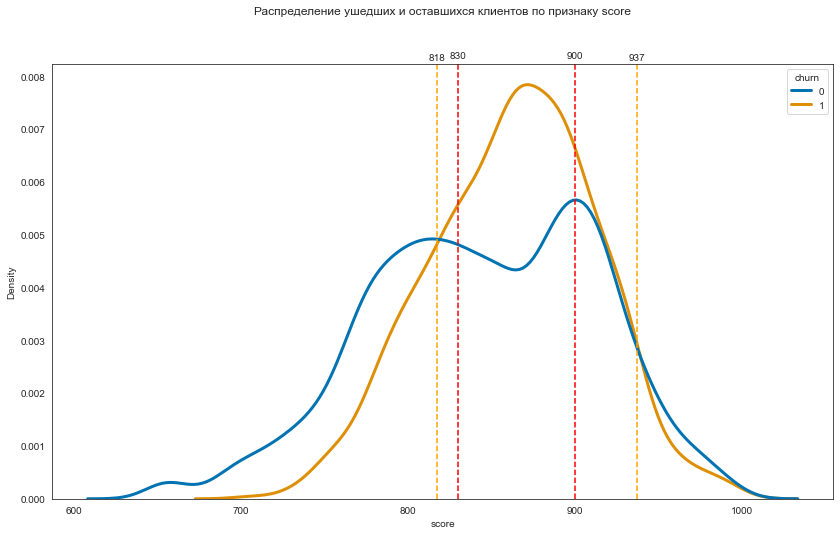

In [88]:
hist_compare(df_bank, 'score', 'churn', vert_lines=[830, 900])

Можем отметить, что клиенты, у которых баллы кредитного рейтинга находятся в диапазоне от 830 до 900, более склонных уходить. 
Клиенты, которые остаются, чаще имеют кредитный рейтинг в районе 800 баллов и менее, либо более 950 баллов, но почему то в промежутке между значениями 800 и 900 есть "провал" по остающимся клиентам.

In [89]:
#посчитаем уровень оттока в зависимости от количества баллов собственности
churn_ratio_between_830_900 = df_bank.query('830 <=score <=900')['churn'].mean()
churn_ratio_out_830_900 = df_bank.query('(score < 830) or (score > 900)')['churn'].mean()

print(f'\033[1m{"Уровень оттока клиентов с кредитным рейтингом от 830 до 900 баллов: "}{churn_ratio_between_830_900:.1%}\033[0m')
print(f'\033[1m{"Уровень оттока клиентов с кредитным рейтингом менее 830 или более 900 баллов: "}{churn_ratio_out_830_900:.1%}\033[0m')

Уровень оттока клиентов с кредитным рейтингом от 830 до 900 баллов: 25.0%
Уровень оттока клиентов с кредитным рейтингом менее 830 или более 900 баллов: 14.2%


<a id="churn_city"></a>

### Зависимость оттока клиентов от города

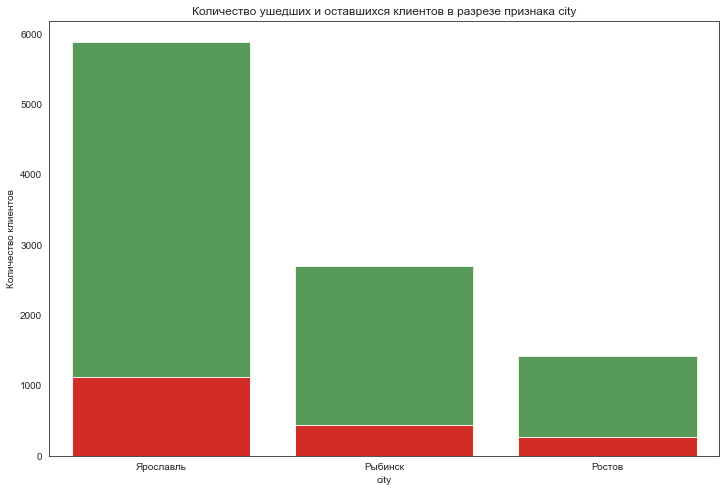

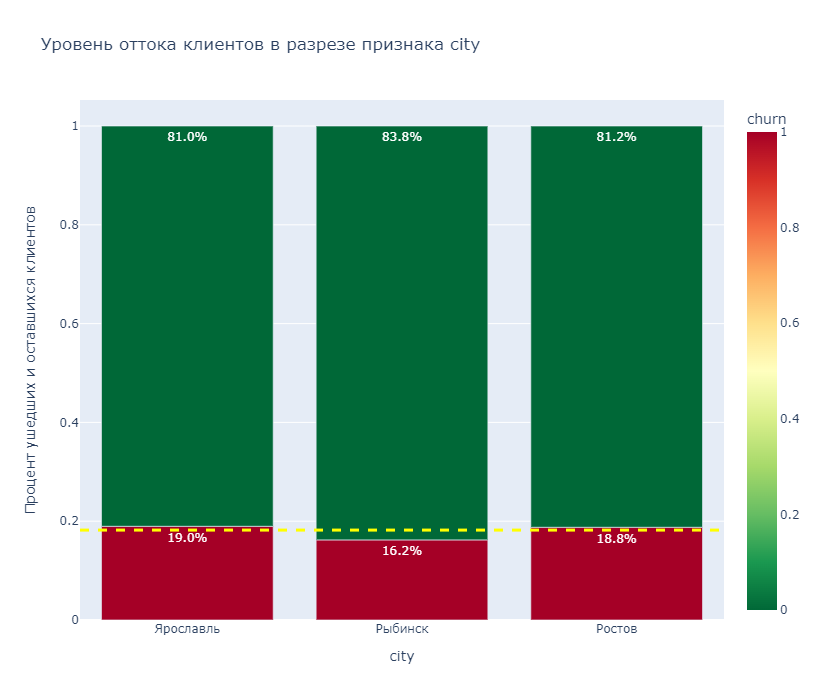

city  churn  clients  total_clients_by_category  proportion
5  Ярославль      1     1117                       5888        0.19
4  Ярославль      0     4771                       5888        0.81
3    Рыбинск      1      437                       2695        0.16
2    Рыбинск      0     2258                       2695        0.84
1     Ростов      1      266                       1417        0.19
0     Ростов      0     1151                       1417        0.81

In [90]:
#вызываем функцию для определения доли оттока в разрезе города
churn_for_category(df_bank, 'city')

В Ярославле и Рыбинске уровень оттока превышает средний уровень оттока по всему набору данных, но несущественно, не более чем на `1%`. 

В Рыбинске уровень оттока на `2%` ниже среднего.

<a id="churn_gender"></a>

### Зависимость оттока клиентов от пола

In [91]:
#вернём колонку с М и Ж для лучшего отображения на диаграммах
df_bank['gender_category'] = df_bank['gender'].replace({0 : 'Ж', 1 : 'М'})

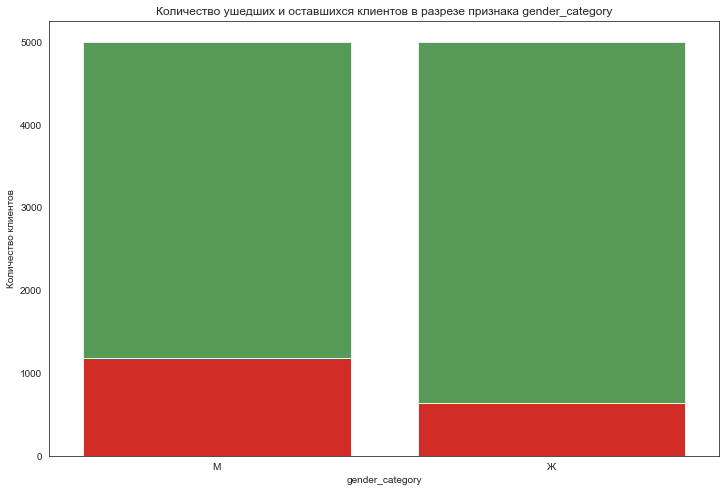

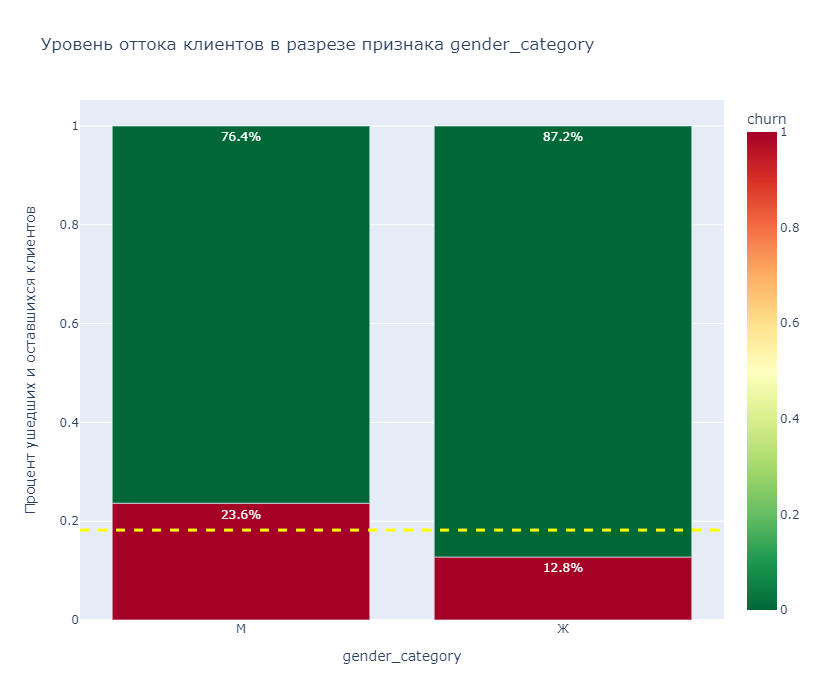

gender_category  churn  clients  total_clients_by_category  proportion
3               М      1     1183                       5005        0.24
2               М      0     3822                       5005        0.76
1               Ж      1      637                       4995        0.13
0               Ж      0     4358                       4995        0.87

In [92]:
churn_for_category(df_bank, 'gender_category')

Мужщины более склонны уходить из банка, уровень оттока среди них выше среднего на `5%`, и более чем на `10%` выше, чем среди женщин.

<a id="churn_age"></a>

### Зависимость оттока клиентов от возраста

Оставим для анализа клиентов, у которых заполнены данные о возрасте.

In [93]:
#создаём датафрейм, в котором уберём строки с пропусками в возрасте, и оставим только нужные столбцы
df_bank_age = df_bank[~df_bank['age'].isna()][['age', 'age_category', 'churn']]
df_bank_age['age'] = df_bank_age['age'].astype('int')

Построим распределения по оттоку клиентов в разрезе возраста.

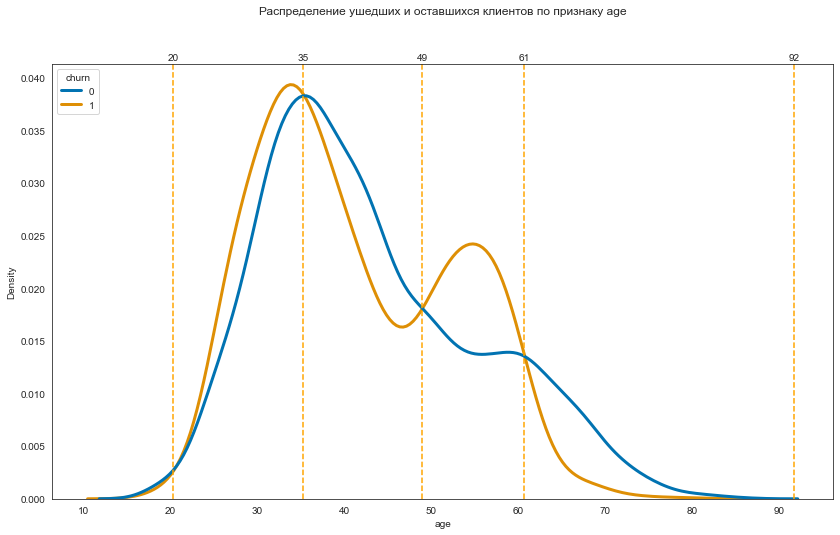

In [94]:
hist_compare(df_bank_age, 'age', 'churn', vert_lines=[])

Динамика остающихся и уходящих клиентов немного меняется в зависимости от возраста. В возрасте 25-34 года клиенты более склонны уходить, затем в 35-44 года - оставаться, а в период с 50 до 60, есть всплеск по доле уходящих клиентов. После 60 лет наоборот, клиенты склонны оставаться. То есть нам нужно внимательно смотреть на клиентов в возрасте 25-34 и 50-60 лет.

Выведем информацию по уровню оттока в разрезе возрастных категорий, которые мы выделили ранее.

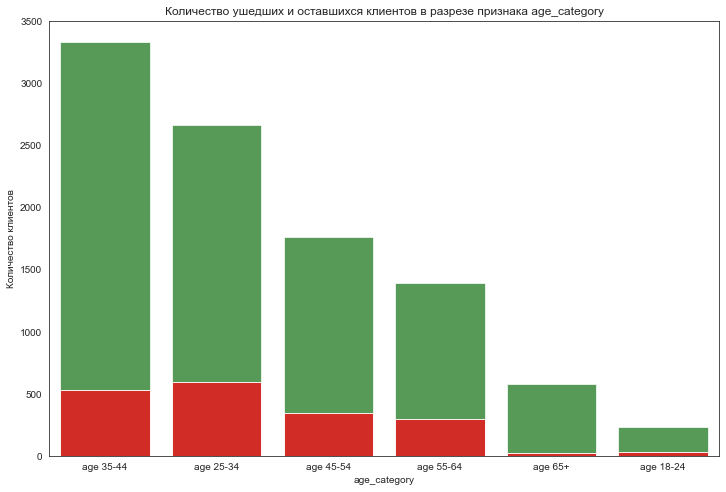

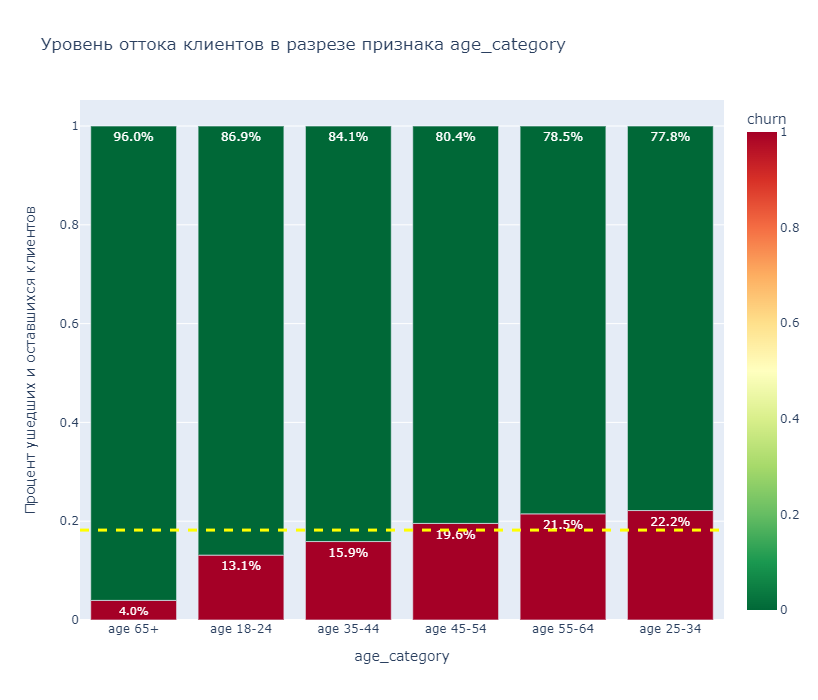

age_category  churn  clients  total_clients_by_category  proportion
11      age 65+      1       23                        579        0.04
1     age 18-24      1       31                        236        0.13
5     age 35-44      1      530                       3337        0.16
7     age 45-54      1      344                       1759        0.20
9     age 55-64      1      300                       1396        0.21
3     age 25-34      1      591                       2667        0.22
2     age 25-34      0     2076                       2667        0.78
8     age 55-64      0     1096                       1396        0.79
6     age 45-54      0     1415                       1759        0.80
4     age 35-44      0     2807                       3337        0.84
0     age 18-24      0      205                        236        0.87
10      age 65+      0      556                        579        0.96

In [95]:
churn_for_category_sort_by_proportion(df_bank, 'age_category')

Остаются в банка молодые клиенты, в категории 18-24 года, и пожилые в категории 65+. Также меньше среднего отток среди клиентов в категории 35-44 года.

Процент оттока на несколько процентов выше среднего наблюдается среди возрастов 25-34, 45-54 и 55-64. 

<a id="churn_equity"></a>

### Зависимость оттока клиентов от баллов собственности

Рассмотрим уровень оттока в разрезе количества оценки собственности.

Выделим в отдельную категорию клиентов, у которых 6 и более баллов собственности.

In [96]:
#выделяем в отдельную категорию клиентов, у которых 6 и более баллов собственности
df_bank['equity_n'] = df_bank['equity'].apply(lambda x: f'{x}' if x<6 else '6+')

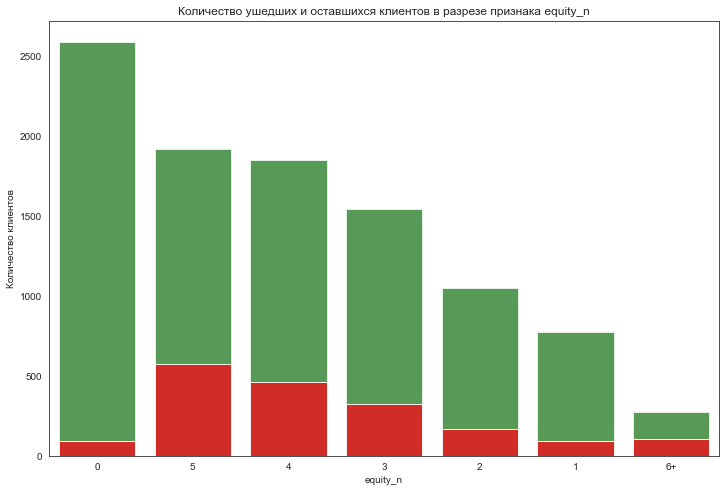

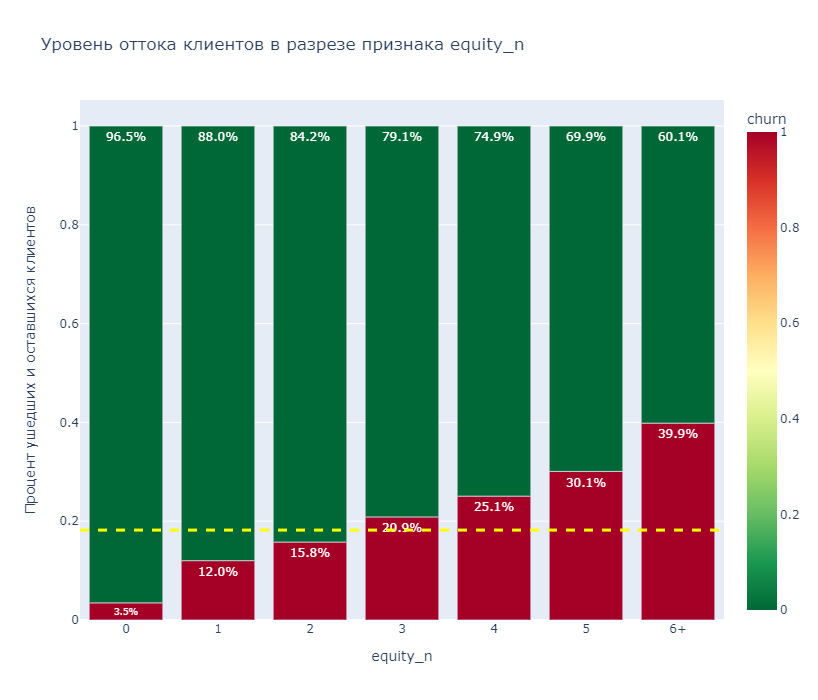

equity_n  churn  clients  total_clients_by_category  proportion
1         0      1       90                       2592        0.03
3         1      1       93                        774        0.12
5         2      1      166                       1052        0.16
7         3      1      322                       1543        0.21
9         4      1      464                       1850        0.25
11        5      1      577                       1918        0.30
13       6+      1      108                        271        0.40
12       6+      0      163                        271        0.60
10        5      0     1341                       1918        0.70
8         4      0     1386                       1850        0.75
6         3      0     1221                       1543        0.79
4         2      0      886                       1052        0.84
2         1      0      681                        774        0.88
0         0      0     2502                       2592        0.97

In [97]:
churn_for_category_sort_by_proportion(df_bank, 'equity_n')

Клиенты, у которых нет собственности, практически не уходят из банка. Уровень оттока среди них составляет лишь `3.5%`.

Чем больше становится собственности у клиентов, тем более высока вероятность их ухода из банка.
Начиная с трёх баллов собственности, уровень оттока превышает средний, а для клиентов с четырьмя и более баллами, уровень оттока становится критичным, достигая практически 40% для клиентов, у которых более 5 баллов.

Для нас интрересно обратить внимание на клиентов, у которых от 3 до 5 баллов, так как суммарно они составляют более половины от общего числа клиентов, при этом уровень оттока среди них высокий. 

<a id="churn_balance"></a>

### Зависимость оттока клиентов от баланса на счёте

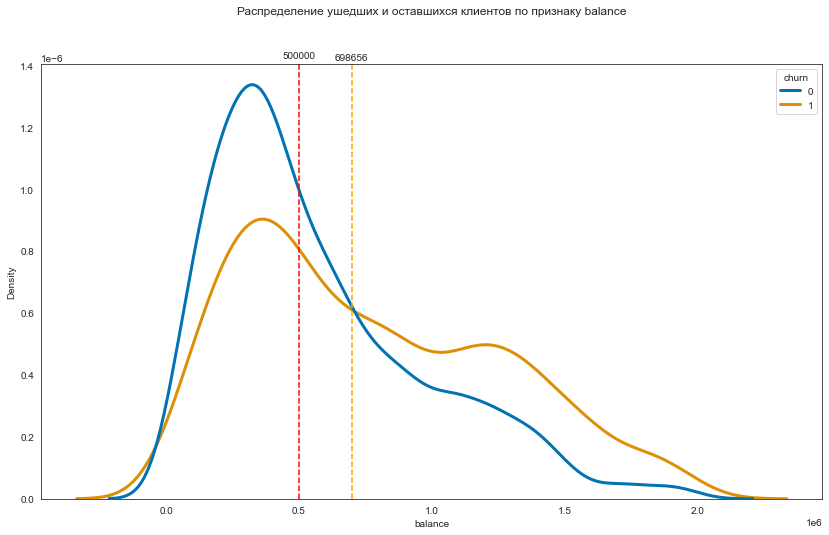

In [98]:
hist_compare(df_bank[df_bank['balance']<2000000], 'balance', 'churn', vert_lines=[500000])

После определённой суммы на остатке, чем больше денег у клиента, тем более склонен он уйти из банка.
Более охотно остаются в банке клиенты с остатками на счёте в районе 300 тысяч рублей, а при росте баланса до 600-700 тысяч и далее, клиенты начинают чаще уходить.

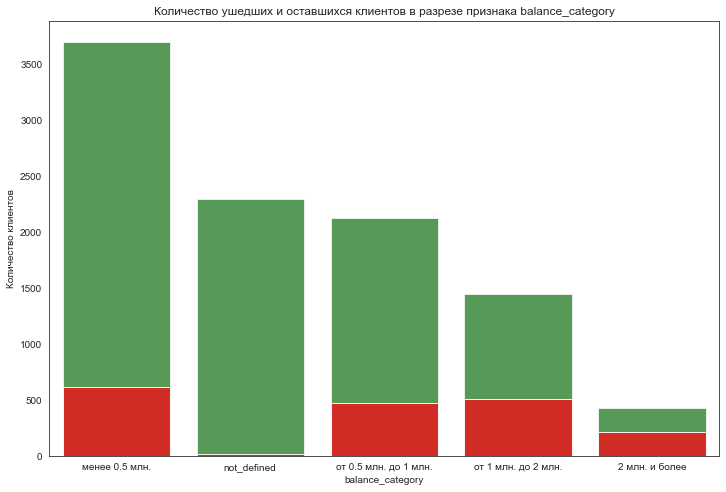

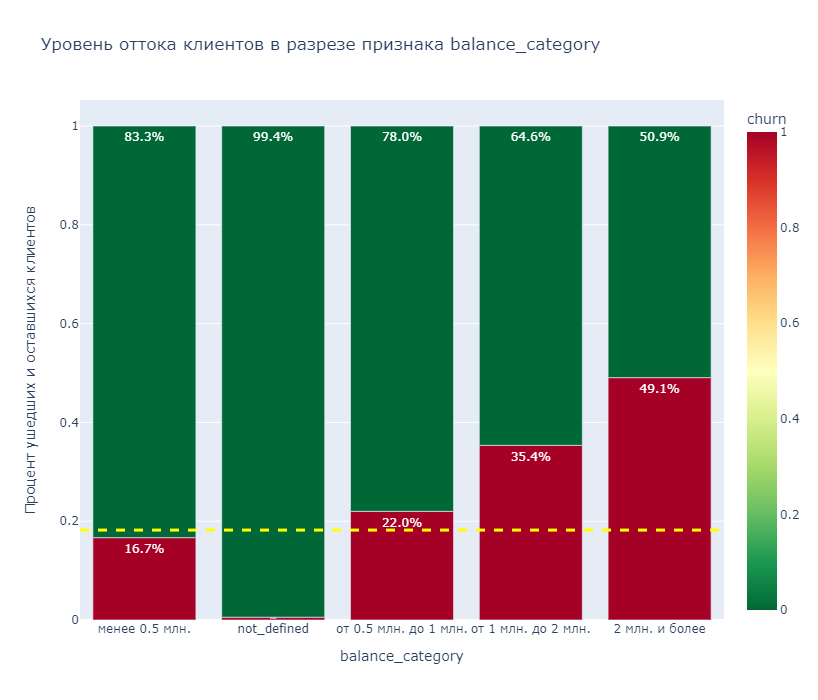

balance_category  churn  clients  total_clients_by_category  \
5         менее 0.5 млн.      1      617                       3701   
4         менее 0.5 млн.      0     3084                       3701   
3            not_defined      1       13                       2295   
2            not_defined      0     2282                       2295   
7  от 0.5 млн. до 1 млн.      1      468                       2128   
6  от 0.5 млн. до 1 млн.      0     1660                       2128   
9    от 1 млн. до 2 млн.      1      512                       1448   
8    от 1 млн. до 2 млн.      0      936                       1448   
1         2 млн. и более      1      210                        428   
0         2 млн. и более      0      218                        428   

   proportion  
5        0.17  
4        0.83  
3        0.01  
2        0.99  
7        0.22  
6        0.78  
9        0.35  
8        0.65  
1        0.49  
0        0.51

In [99]:
churn_for_category(df_bank, 'balance_category')

Интересно отметить, что клиенты, для которых не указан уровень баланса на счёте, практически не уходят из банка. Возможно, среди них, кроме прочего, есть какая-то доля новых клиентов, которые только недавно пришли в банк, а также, как мы отмечали ранее, клиенты с нулевыми и отрицательными остатками.

Чем больше денег на балансе у клиента, тем более склонен он уйти из банка. При накоплении более 500 тысяч на балансе, уровень оттока начинает превышать средний уровень, а при накоплении более 1 миллиона клиенты начинают массово уходить. То есть в банке видимо есть проблема с условиями обслуживания состоятельных клиентов.

<a id="churn_products"></a>

### Зависимость оттока клиентов от количества банковских продуктов

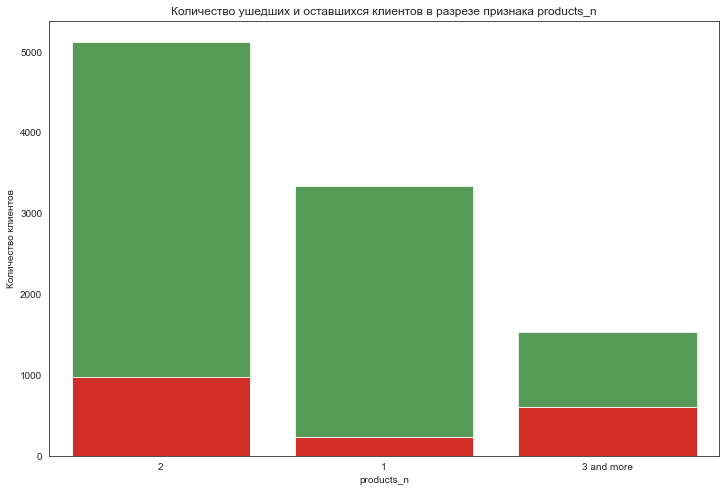

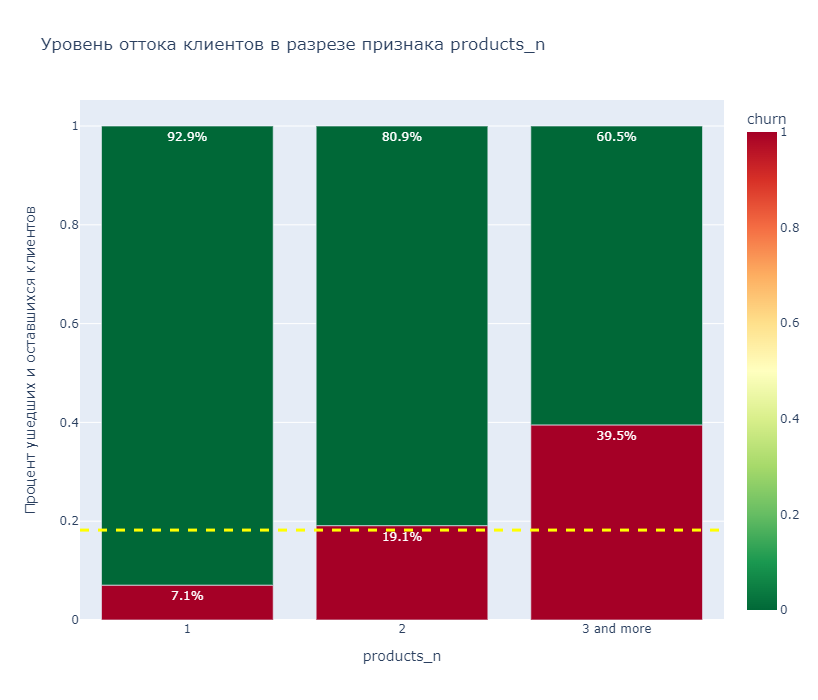

products_n  churn  clients  total_clients_by_category  proportion
1           1      1      236                       3342        0.07
3           2      1      979                       5126        0.19
5  3 and more      1      605                       1532        0.39
4  3 and more      0      927                       1532        0.61
2           2      0     4147                       5126        0.81
0           1      0     3106                       3342        0.93

In [100]:
churn_for_category_sort_by_proportion(df_bank, 'products_n')

Хорошо удерживаются клиенты с одним банковским продуктом, средне - с двумя, и очень плохо - с тремя и более продуктами.

<a id="churn_credit_card"></a>

### Зависимость оттока клиентов от наличия кредитной карты

Рассмотрим зависимость уровня оттока от наличия кредитной карты.

In [101]:
#сделаем колонку с текстовым описанием наличия кредитной карты
df_bank['has_credit_card'] = df_bank['credit_card'].apply(lambda x: 'Есть кредитная карта' if x==1 else 'Нет кредитной карты' if x==0 else 'pass')

Отразим уровни оттока в разрезе наличия кредитной карты.

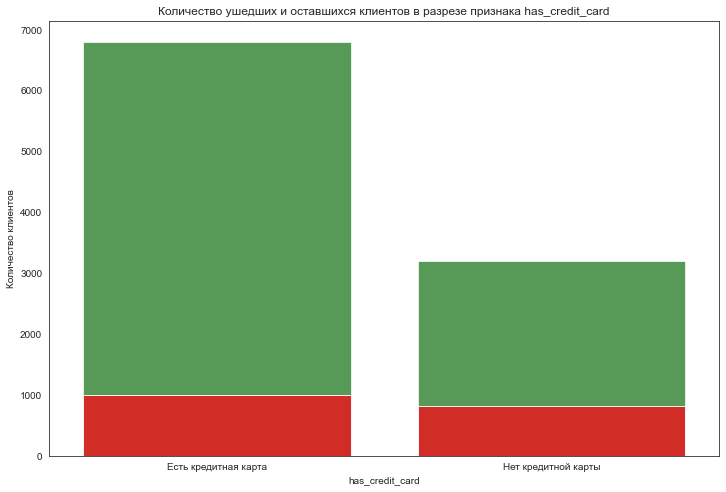

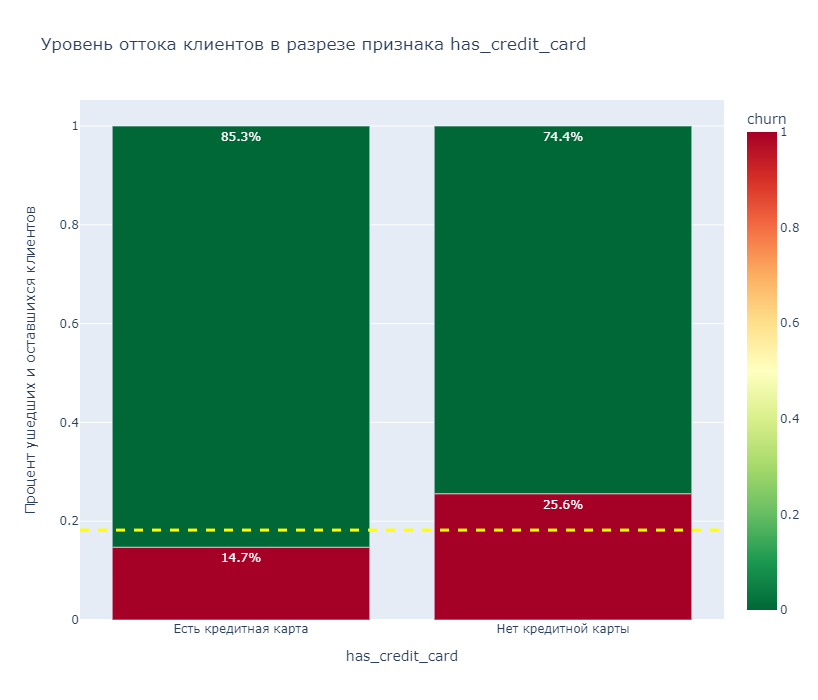

has_credit_card  churn  clients  total_clients_by_category  proportion
1  Есть кредитная карта      1     1003                       6804        0.15
0  Есть кредитная карта      0     5801                       6804        0.85
3   Нет кредитной карты      1      817                       3196        0.26
2   Нет кредитной карты      0     2379                       3196        0.74

In [102]:
churn_for_category(df_bank, 'has_credit_card')

Клиенты без кредитной карты чаще уходят, уровень оттока превышает средний уровень, и более чем на `10%` превышает уровень оттока среди клиентов, у которых есть кредитная карта.

Но общее количество клиентов без кредитной в два раза меньше тех, у кого карта есть.

<a id="churn_last_activity"></a>

### Зависимость оттока клиентов от их активности

In [103]:
#назовём категории "Активный" и "Неактивный"
df_bank['activity_category'] = df_bank['last_activity'].replace({0 : 'Неактивный', 1 : 'Активный'})

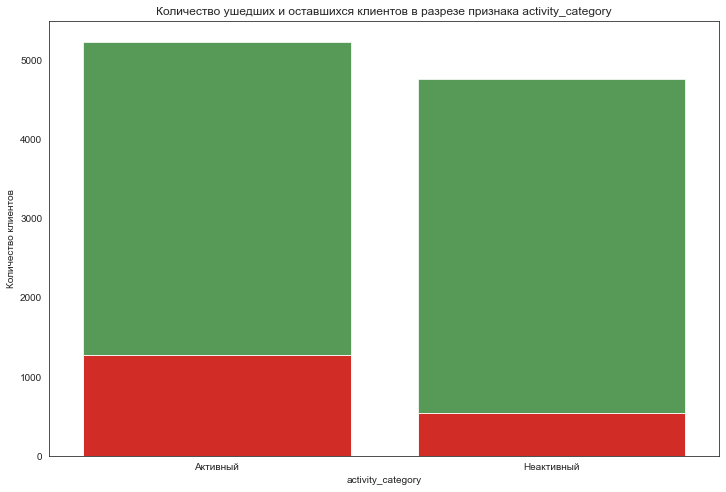

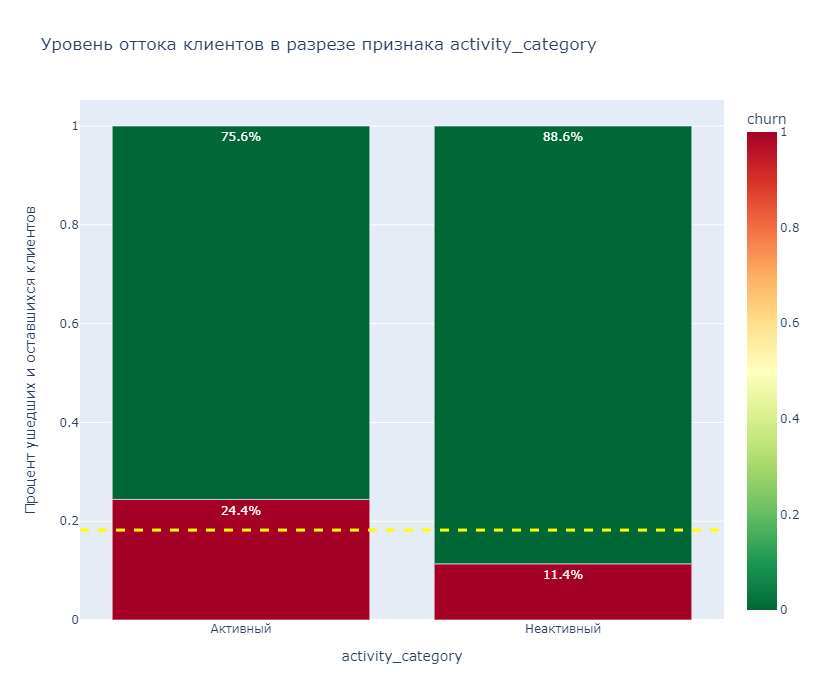

activity_category  churn  clients  total_clients_by_category  proportion
1          Активный      1     1278                       5235        0.24
0          Активный      0     3957                       5235        0.76
3        Неактивный      1      542                       4765        0.11
2        Неактивный      0     4223                       4765        0.89

In [104]:

churn_for_category(df_bank, 'activity_category')

Активные клиенты более склонны к уходу из банка.

<a id="churn_salary"></a>

### Зависимость оттока клиентов от размера зарплаты

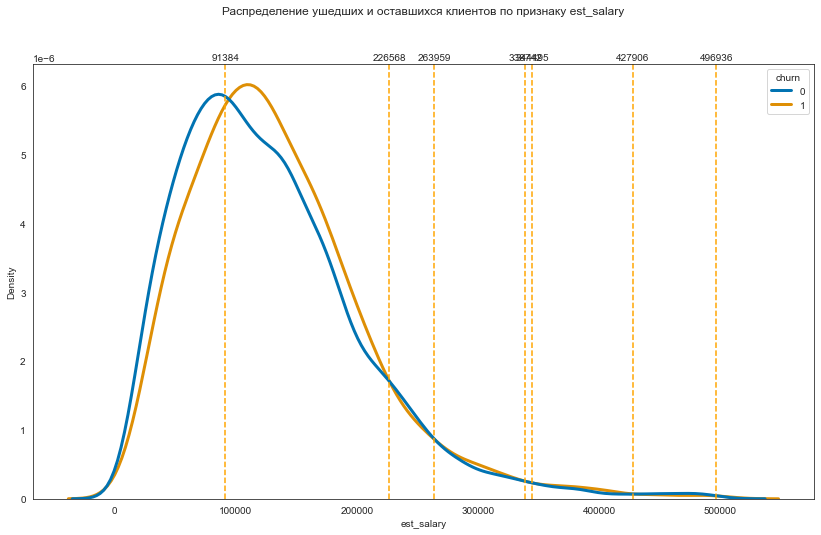

In [105]:
hist_compare(df_bank[df_bank['est_salary']<500000], 'est_salary', 'churn')

Распределения по зарплате отточных и остающихся клиентов идут рядышком, но при зарплате менее 100 тысяч рублей клиенты чуть более склонны оставаться, а с зарплатой от 100 до 200 тысяч, чуть более склонны уходить.

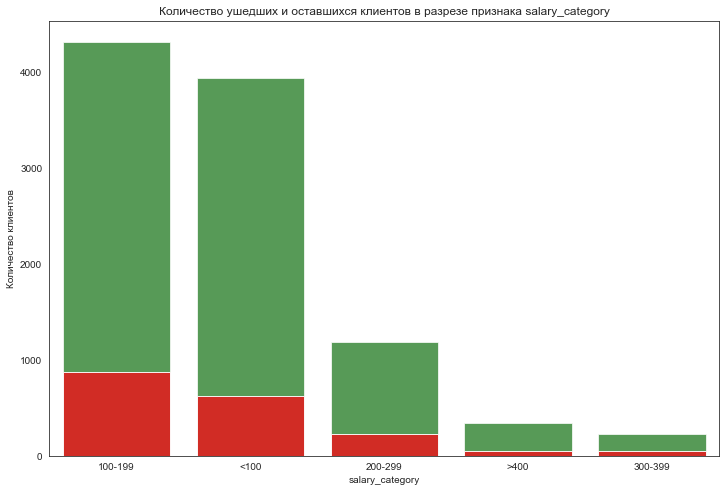

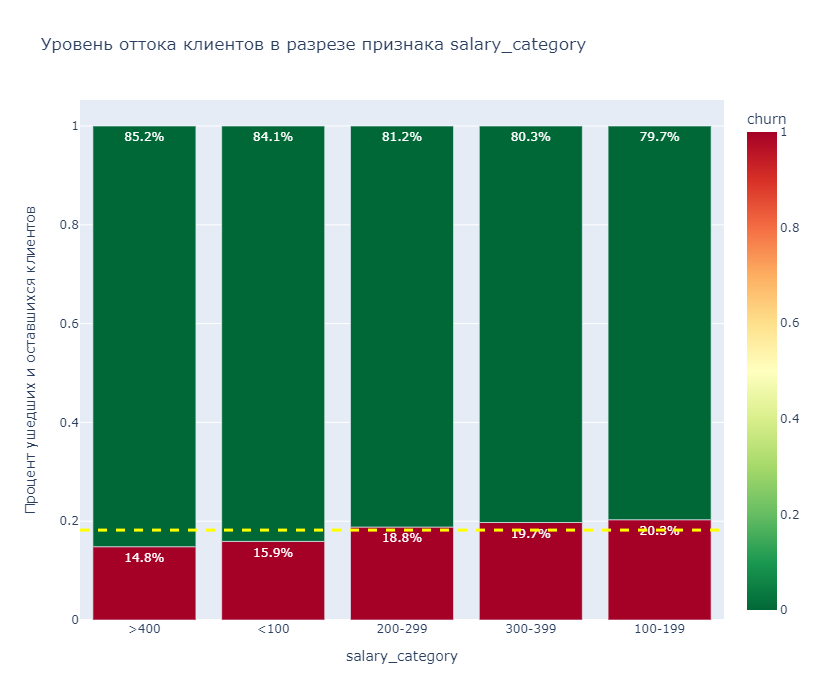

salary_category  churn  clients  total_clients_by_category  proportion
9            >400      1       50                        337        0.15
7            <100      1      626                       3934        0.16
3         200-299      1      223                       1185        0.19
5         300-399      1       45                        228        0.20
1         100-199      1      876                       4316        0.20
0         100-199      0     3440                       4316        0.80
4         300-399      0      183                        228        0.80
2         200-299      0      962                       1185        0.81
6            <100      0     3308                       3934        0.84
8            >400      0      287                        337        0.85

In [106]:
churn_for_category_sort_by_proportion(df_bank, 'salary_category')

В целом, нет сильных отклонений от среднего уровня оттока в зависимости от размера зарплаты.

При зарплате менее 100 тысяч и более 400 тысяч, уровень оттока меньше среднего на несколько процентных пунктов.
Если же зарплата находится в диапазоне от 100 до 400 тысяч, то уровень оттока на несколько процентных пунктов больше среднего уровня. Наиболее высок уровень оттока в группе с зарплатой от 100 до 200 тысяч.

<a id="churn_resume"></a>

### Выводы по разделу

Можно отметить зависимость уровня оттока клиентов от большинства из рассмотренных признаков. 

__Наиболее сильно на уровень оттока влияют:__
- количество продуктов;
- оценка собственности;
- размер баланса на счёте клиента.

__Среднее влияние на уровень оттока оказывают:__
- активность клиента;
- пол клиента;
- наличие кредитной карты;
- кредитный рейтинг клиента.

__Оказывают слабое влияние на уровень оттока или практически на него не влияют:__
- город;
- размер зарплаты.

__Факторы, которые негативно влияют на уровень оттока клиентов:__
- баллы кредитного скоринга в диапазоне от 830 до 900;
- клиент является мужчиной;
- возраст клиента от 50 до 60 лет или от 25 до 34 лет;
- более трёх баллов собственности (особенно критично 5 и более баллов) 
- баланс на счёте более 500 тысяч;
- клиент имеет более двух банковских продуктов;
- отсутствует кредитная карта;
- клиент активен - совершает активные действия со своими банковскими продуктами;
- зарплата клиента в диапазоне от 100 до 200 тысяч рублей.

__Факторы, которые позитивно влияют на уровень оттока клиентов:__
- баллы кредитного скоринга менее 800 или более 950;
- клиент является женщиной;
- клиент из Рыбинска;
- возрастные категории `65+`, `18-24` или `35-44`;
- отсутствие собственности или её оценка не более двух баллов;
- баланс на счёте менее 500 тысяч;
- использование не более двух банковских продуктов;
- наличие кредитной карты;
- клиент не является активным;
- зарплата менее 100 или более 400 тысяч рублей.

<a id="hypothesis"></a>

## Проверка статистических гипотез

<a id="hypothesis_1"></a>

### Гипотеза о различии дохода

Проверим гипотезу о различии дохода между теми клиентами, которые ушли и теми, которые остались.

Сначала посмотрим на распределение зарплат клиентов, в разрезе ушедших и остающихся.

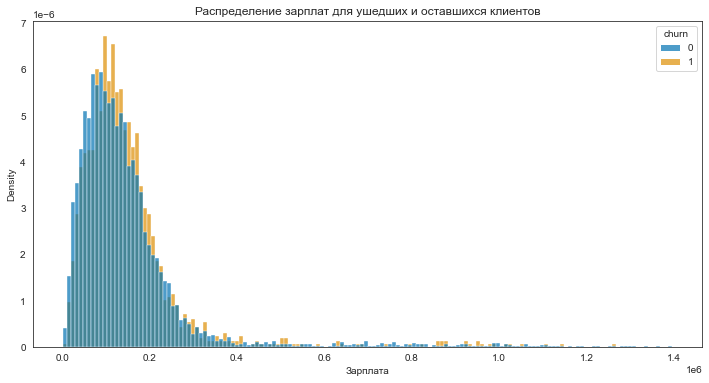

In [107]:
#строим гистограммы по распределению зарплат для ушедших и оставшихся клиентов
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=df_bank, x='est_salary', hue='churn'
             , stat='density', common_norm=False,
             alpha=.7
            )
ax.set_title('Распределение зарплат для ушедших и оставшихся клиентов')
ax.set_xlabel('Зарплата')


plt.show()

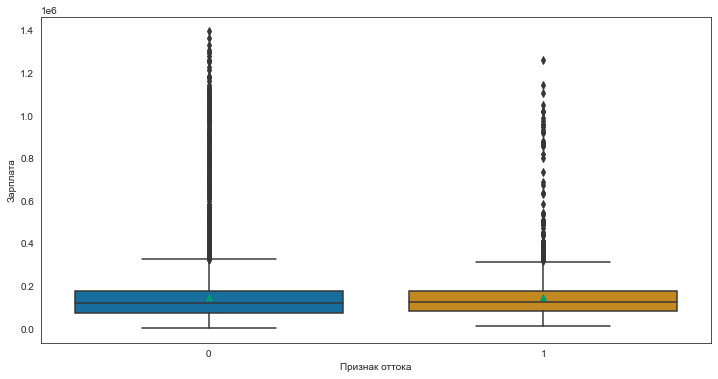

In [108]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(y="est_salary", x="churn", showmeans=True,
            data=df_bank)
ax.set_xlabel('Признак оттока')
ax.set_ylabel('Зарплата')

plt.show()

Посчитаем 95-й, 97.5 и 99-й перцентили в распределении зарплат.

In [109]:
#выводим перцентили
print('Перцентили [95, 97.5, 99] зарплат оставшихся клиентов:')
print(np.percentile(df_bank[df_bank['churn']==0]['est_salary'], [95, 97.5, 99])) 
print()
print('Перцентили [95, 97.5, 99] зарплат ушедших клиентов:')
print(np.percentile(df_bank[df_bank['churn']==1]['est_salary'], [95, 97.5, 99])) 

Перцентили [95, 97.5, 99] зарплат оставшихся клиентов:
[321003.7465  567563.80875 906141.8267 ]

Перцентили [95, 97.5, 99] зарплат ушедших клиентов:
[304032.831   411980.51325 857259.7004 ]


Зарплаты более 500 тысяч встречаются редко, исключим их из рассмотрения и ещё раз посмотрим на гистограммы.

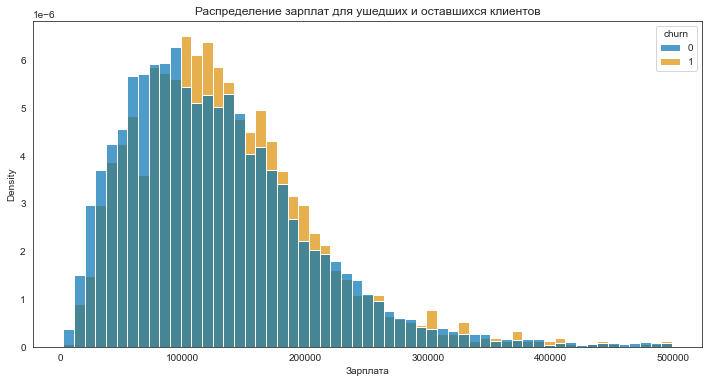

In [110]:
#строим гистограммы по распределению зарплат для ушедших и оставшихся клиентов
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=df_bank[df_bank['est_salary']<500000], x='est_salary', hue='churn'
             , stat='density', common_norm=False,
             alpha=.7
            )
ax.set_title('Распределение зарплат для ушедших и оставшихся клиентов')
ax.set_xlabel('Зарплата')


plt.show()

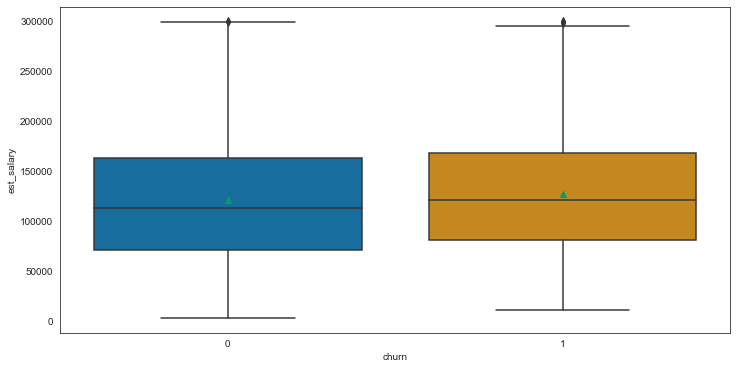

In [111]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(y="est_salary", x="churn", showmeans=True,
            data=df_bank[df_bank['est_salary']<300000])
plt.show()

На гистограмме видно, что зарплата ушедших клиентов слегка смещена вправо, то есть немного превышает зарплату остающихся клиентов, но на boxplot сложно визуально отметить различия в зарплатах между ушедшими и остающимися клиентами. Проверим, есть ли статистически значимые различия.

Сформулируем гипотезы:

```
H_0: Средняя зарплата клиентов, которые ушли из банка = Средней зарплате клиентов, остающихся в банке. Разницы между группами нет.
H_1: Средняя зарплата клиентов, которые ушли из банка ≠ Средней зарплате клиентов, остающихся в банке. Разница между группами есть.
alpha = 0.05
```

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам применим критерий Стьюдента, используем специальный метод `st.ttest_ind`. 
В нашем случае соблюдаются требования к возможности применения данного метода:
- генеральные совокупности не зависят друг от друга;
- так как в наших выборках достаточно наблюдений, то в соответствии с центральной предельной теоремой, выборочное среднее распределено нормально вокруг среднего генеральной совокупности; 
- так как размеры выборок у нас отличаются, а также мы не можем утверждать, что дисперсии у генеральных совокупностей одинаковые, то укажем значение `equal_var=False`.


Можно было бы использовать непараметрический тест «U-критерий Манна-Уитни», подходящий для работы с данными, в которых есть выбросы. Чтобы снизить чувствительность t-теста к выбросам, мы также выполним проверку гипотезы на очищенных данных, исключив из рассмотрения выбивающиеся значения зарплат.


Уровень статистической значимости, то есть вероятность случайно получить в реальном наблюдении значение, далёкое от предполагаемого в нулевой гипотезе, определим равным 5%. Соответственно для нашего теста мы считаем приемлемым риск с вероятностью в 5% отклонить нулевую гипотезу при отсутствии различий между сравниваемыми группами, так как вероятность ошибки первого рода равна уровню значимости α.

__Проверим гипотезу на полных данных из датасета__

In [112]:
#формируем выборки зарплат, для клиентов, которые ушли, и которые остались
churn_sample = df_bank[df_bank['churn'] == 1]['est_salary']
not_churn_sample = df_bank[df_bank['churn'] == 0]['est_salary']

#вызов метода для проверки гипотезы
results = st.ttest_ind(churn_sample, not_churn_sample, equal_var=False)

#зададим значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(f'Значение pvalue = {results.pvalue:.4f}')
print(f'Уровень значимости alpha = {alpha}')

# выводом строки с ответом
if results.pvalue < alpha:
    print('pvalue < alpha')
    print('\033[1mОтвергаем нулевую гипотезу\033[0m')
else:
    print('pvalue > alpha')
    print('\033[1mНе получилось отвергнуть нулевую гипотезу\033[0m')
    
#выведем средние значения выборок и разницу между средними значениями
print()
print(f'Средняя зарплата ушедших клиентов    : {churn_sample.mean():.2f}')
print(f'Средняя зарплата остающихся клиентов : {not_churn_sample.mean():.2f}')
print(f'Разница между средними зарплатами    : {abs(churn_sample.mean() - not_churn_sample.mean()):.2f}')

Значение pvalue = 0.8887
Уровень значимости alpha = 0.05
pvalue > alpha
Не получилось отвергнуть нулевую гипотезу

Средняя зарплата ушедших клиентов    : 148243.01
Средняя зарплата остающихся клиентов : 147783.20
Разница между средними зарплатами    : 459.81


На полных данных, не очищенных от аномально больших зарплат, не удалось отвергнуть нулевую гипотезу и выявить статистически значимых отличий между доходом ушедших и оставшихся клиентов.

In [113]:
print(churn_sample.describe())
print(not_churn_sample.describe())

count      1820.00
mean     148243.01
std      122914.51
min       10880.27
25%       83111.32
50%      125390.62
75%      175952.93
max     1263028.49
Name: est_salary, dtype: float64
count      8180.00
mean     147783.20
std      142802.38
min        2546.30
25%       73506.15
50%      118257.71
75%      173990.12
max     1395064.45
Name: est_salary, dtype: float64


__Проверим гипотезу на очищенных данных__

Проверим гипотезу на данных, очищенных от редких значений зарплат, то есть от тех, которые превышают 500 тысяч.

In [114]:
#формируем выборки зарплат, для клиентов, которые ушли, и которые остались
churn_sample = df_bank[(df_bank['churn'] == 1) & (df_bank['est_salary']<500000)]['est_salary']
not_churn_sample = df_bank[(df_bank['churn'] == 0) & (df_bank['est_salary']<500000)]['est_salary']

#вызов метода для проверки гипотезы
results = st.ttest_ind(churn_sample, not_churn_sample, equal_var=False)

#зададим значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(f'Значение pvalue = {results.pvalue:.4f}')
print(f'Уровень значимости alpha = {alpha}')

# выводом строки с ответом
if results.pvalue < alpha:
    print('pvalue < alpha')
    print('\033[1mОтвергаем нулевую гипотезу\033[0m')
else:
    print('pvalue > alpha')
    print('\033[1mНе получилось отвергнуть нулевую гипотезу\033[0m')
    
#выведем средние значения выборок и разницу между средними значениями
print()
print(f'Средняя зарплата ушедших клиентов    : {churn_sample.mean():.0f}')
print(f'Средняя зарплата остающихся клиентов : {not_churn_sample.mean():.0f}')
print(f'Разница между средними зарплатами    : {abs(churn_sample.mean() - not_churn_sample.mean()):.0f}')

Значение pvalue = 0.0006
Уровень значимости alpha = 0.05
pvalue < alpha
Отвергаем нулевую гипотезу

Средняя зарплата ушедших клиентов    : 134620
Средняя зарплата остающихся клиентов : 127956
Разница между средними зарплатами    : 6664


Мы использовали метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

Формулировка нулевой гипотезы противоположна изначальной гипотезе о разности доходов, и утверждает, что средние зарплаты клиентов, ушедших и остающихся, одинаковы.

По итогам теста на "сырых" данных мы не смогли отвергнуть нулевую гипотезу.
После того, как мы исключили выбивающиеся значения зарплат, превышающие 500 тысяч рублей, и провели проверку гипотезы на очищенных даннных, можем сделать следующий вывод:

__По итогам теста__,  на очищенных данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних зарплат ушедших и остающихся клиентов в пользу альтернативной гипотезы. Соответственно с большой вероятностью средние зарплаты ушедших и остающихся пользователей различаются. 


<a id="hypothesis_2"></a>

### Гипотеза о равенстве долей ушедших клиентов, в зависимости от наличия кредитной карты

Проверим, есть ли статитистически значимые различия между долями ушедших клиентов, у которых была кредитная карта и у которых не было кредитной карты.

Сформулируем нулевую и альтернативную гипотезы:

```
    H_0: Доля ушедших клиентов, у которых есть кредитная карта = Доле ушедших клиентов, у которых нет кредитной карты.
    H_1: Доля ушедших клиентов, у которых есть кредитная карта ≠ Доле ушедших клиентов, у которых нет кредитной карты.
    alpha = 0.05
``` 

Разделим клиентов на две группы: "Есть кредитная карта" и "Нет кредитной карты", и представим данные в виде своеобразной воронки из двух шагов, где на первом шаге указано общее количество клиентов в каждой группе, а на втором шаге указано количество ушедших клиентов.

При оценке среднего значения генеральной совокупности выборочные средние нормально распределены вокруг среднего всей совокупности независимо от того, как распределена сама генеральная совокупность. Это одна из формулировок центральной предельной теоремы.

Нам требуется решить задачу сравнения пропорций двух генеральных совокупностей по выборкам из них. Разница между пропорциями, наблюдаемыми на выборках, будет нашей статистикой, которая распределена нормально.

Поскольку полученная статистика будет распределена нормально, то можно проводить двусторонние и односторонние тесты.

Мы определим разность пропорций в двух группах клиентов: "Есть кредитная карта" и "Нет кредитной карты". Затем посчитаем статистику в стандартных отклонениях стандартного нормального распределения. Если бы пропорции были равны, разница между ними была бы равна нулю. Посчитаем, как далеко статистика уехала от нуля и определим, какова вероятность получить такое отличие или больше. Вызовем метод cdf(), который говорит нам о вероятности того, что случайная величина примет значение, меньшее или равное некоторому значению. Саму статистику возьмём по модулю методом abs() — чтобы получить правильный результат независимо от её знака. Это возможно, потому что тест двусторонний. По этой же причине удвоим результат.

In [115]:
#подготовим данные для проверки гипотезы

#считаем клиентов, у которых есть кредитная карта в разрезе ушёл/остался
with_cred_card = (df_bank[df_bank['credit_card']==1]
                  .groupby('churn')
                  .agg(with_cred_card=('credit_card', 'count'))
                 )
#считаем клиентов, у которых нет кредитной карты в разрезе ушёл/остался
without_cred_card = (df_bank[df_bank['credit_card']==0]
                     .groupby('churn')
                     .agg(without_cred_card=('credit_card', 'count'))
                    )
#объединяем данные в один датафрейм
df_funnels = with_cred_card.join(without_cred_card).reset_index()

# вычисляем суммы значений по столбцам with_cred_card и without_cred_card,
#чтобы определить общее количество клиентов в каждой группе
col_sums = df_funnels[['with_cred_card', 'without_cred_card']].sum(axis=0)

# присваиваем суммы значений первой строке датафрейма только для столбцов with_cred_card и without_cred_card
df_funnels.loc[0, ['with_cred_card', 'without_cred_card']] = col_sums

#Переименовываем название строк и первой колонки
df_funnels.loc[0, 'churn'] = 'Всего клиентов'
df_funnels.loc[1, 'churn'] = 'Ушло клиентов'
df_funnels = df_funnels.rename(columns={'churn' : 'Этап'})


In [116]:
#выводим результат
display(df_funnels)

Этап  with_cred_card  without_cred_card
0  Всего клиентов            6804               3196
1   Ушло клиентов            1003                817

In [117]:
count = list(df_funnels.iloc[1, 1:])
nobs = list(df_funnels.iloc[0, 1:])
stat, pval = proportions_ztest(count, nobs)
print('p-value = {0:0.3f}'.format(pval))


p-value = 0.000


In [118]:
print(count)
print(nobs)

[1003, 817]
[6804, 3196]


Подготовим функцию с помощью которой будем проверять гипотезу о равенстве долей клиентов.

__Определение функции hypothesis_testing__

In [119]:
def hypothesis_testing(current_step,  next_step, alpha):
    alpha = alpha  # критический уровень статистической значимости

    # пропорция переходов на следующий шаг в первой группе:
    p1 = next_step[1] / current_step[1]
    
    # пропорция переходов на следующий шаг во второй группе:
    p2 = next_step[2] / current_step[2]
    
    # пропорция в выборке, скомбинированной из двух наблюдаемых:
    p_combined = (next_step[1] + next_step[2]) / (current_step[1] + current_step[2])
    
    # разница пропорций между первой и второй группами
    difference = p1 - p2

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * ( 1/current_step[1] + 1/current_step[2]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0,1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print(f"Этап \"{next_step[0]}\":")
    print(f"Доля клиентов, совершивших событие: в первой группе - {p1:.2%}, во второй группе - {p2:.2%}")
    print(f"Разница долей между группами: {abs(p1 - p2)*100:.2f} пп.")
    print(f"Проверка на уровне статистической значимости alpha={alpha}")
    print(f'p-значение: {p_value:.4f}')

    if p_value < alpha:
        print(f'{color.BOLD}Отвергаем нулевую гипотезу: между долями есть значимая разница{color.END}')
    else:
        print(f'{color.BOLD}Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными{color.END}')

Либо второй вариант аналогичной функции, с использованием метода метод proportions_ztest:

In [120]:
def hypothesis_testing_new(current_step,  next_step, alpha):
    alpha = alpha  # критический уровень статистической значимости

    count = list(next_step)[1:]
    nobs = list(current_step)[1:]
    stat, p_value = proportions_ztest(count, nobs)

    # пропорция переходов на следующий шаг в первой группе:
    p1 = next_step[1] / current_step[1]
    
    # пропорция переходов на следующий шаг во второй группе:
    p2 = next_step[2] / current_step[2]
    
    print(f"Этап \"{next_step[0]}\":")
    print(f"Доля клиентов, совершивших событие: в первой группе - {p1:.2%}, во второй группе - {p2:.2%}")
    print(f"Разница долей между группами: {abs(p1 - p2)*100:.2f} пп.")
    print(f"Проверка на уровне статистической значимости alpha={alpha}")
    print(f'p-значение: {p_value:.4f}')

    if p_value < alpha:
        print(f'{color.BOLD}Отвергаем нулевую гипотезу: между долями есть значимая разница{color.END}')
    else:
        print(f'{color.BOLD}Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными{color.END}')


Вызовем функцию для проверки гипотезы.

In [121]:
#в качестве данных для текущего шага берём данные об общем количестве пользователей в двух группах
current_step = df_funnels.iloc[0]
#в качестве следующего шага береём данные об ушедших клиентах в каждой из групп
next_step = df_funnels.iloc[1]
#определяем уровень значимости
alpha = 0.05

#вызываем функцию для проверки гипотезы
hypothesis_testing_new(current_step, next_step, alpha)

Этап "Ушло клиентов":
Доля клиентов, совершивших событие: в первой группе - 14.74%, во второй группе - 25.56%
Разница долей между группами: 10.82 пп.
Проверка на уровне статистической значимости alpha=0.05
p-значение: 0.0000
Отвергаем нулевую гипотезу: между долями есть значимая разница


__По итогам теста__ есть основания отвергнуть нулевую гипотезу о равенстве долей ушедших клиентов среди тех у кого есть кредитная карта, и у кого нет кредитной карты, в пользу альтернативной гипотезы. Соотвественно с большой вероятностью можно предположить, что клиенты без кредитной карты чаще уходят из банка, чем клиенты с кредитной картой.

<a id="portrets"></a>

## Портреты клиентов

<a id="portret_churn"></a>

### Портрет клиента, склонного к уходу из банка

На основе проведённого анализа и проверенных гипотез мы можем обрисовать черты клиента, который имеет склонность покинуть наш банк:

Это `мужчина` в `возрасте от 25 до 34 лет`, либо `от 50 до 60 лет`, `активный` клиент банка с `зарплатой от 100 до 200 тысяч`, который имеет `на балансе более 500 тысяч рублей`, пользуется более чем `двумя банковскими продуктами`, `не имеет кредитной карты`, оценивается `кредитным скорингом в диапазоне от 830 до 900 баллов` и владеет `собственностью, оцениваемой на три и более баллов`.



<a id="portret_not_churn"></a>

### Портрет клиента, остающегося в банке

Если же составить портрет клиента, склонного оставаться в банке, то он имеет следующие характеристики:

`Женщина`, относящаяся к `возрастной категории 35-44, 18-24 или 65+`, у которой `отсутствует собственность или её оценка не превышает двух баллов`, с остатком на `балансе менее 500 тысяч`, с `зарплатой менее 100 тысяч` рублей. Клиент `не является активным`, `имеет кредитную карту` и `не более двух банковских продуктов`. 

<a id="segments_churn"></a>

### Наборы признаков клиентов, наиболее склонных к уходу из банка

Выделим сегменты клиентов с наиболее высоким уровнем оттока.

Возьмём факторы, негативно влияющие на уровень оттока и составим из них перечень условий:

In [122]:
#составляем список факторов, которые негативно влияют на уровень оттока
conditions =   [("condition1", "gender == 1"),
                ("condition3", "50 <= age <= 60"),
                ("condition4", "equity >= 3"),
                ("condition5", "balance > 500000"),
                ("condition6", "products > 2"),
                ("condition7", "credit_card == 0"),
                ("condition8", "last_activity == 1"),
                ("condition9", "100000 <= est_salary <= 200000"),
                ("condition11", "age_category == 'age 25-34'"),
                ("condition12", "(830 <=score <= 900)")                     
               ]

df_conditions = pd.DataFrame(conditions, columns=["name", "condition"])

Определим функцию, которая будет среди всех признаков перебирать все возможные комбинации из `n` признаков, считать долю оттока среди клиентов с таким признаками, и записывать информацию в отдельный датасет.

__Определяем функцию churn_by_n_conditions__

Функция принимает на вход датасет с данными, датасет с условиями, и количество условий, по которым нужно выбрать группу клиентов. Далее в цикле для каждой выбранной по определённому набору условий группы считается уровень оттока и записывается в результирующий датасет. 

In [123]:
def churn_by_n_conditions(df, df_conditions, num_of_conditions = 2):
    # создаем пустой датасет для хранения результатов
    results_df = pd.DataFrame(columns=["subset_name", "num_of_conditions", "subset_query", "churn_mean", "subset_size"])

    for subset_conditions in itertools.combinations(df_conditions["condition"], num_of_conditions):
        subset_query = " & ".join(subset_conditions)
        subset_name = " & ".join(df_conditions[df_conditions["condition"].isin(subset_conditions)]["name"])
        subset = df.query(subset_query)
        if not subset.empty:
            churn_mean = subset['churn'].mean()
            subset_size = len(subset)
            results_df.loc[len(results_df)] = [subset_name, num_of_conditions, subset_query, churn_mean, subset_size]

    return results_df

__Определяем функцию loop_from_n_to_m_conditions__

Функция принимает на вход датасет с данными, датасет с условиями, значения n и m, которые определяют диапазон количества условий, по которым нужно составлять группы пользователей, и минимальный размер группы пользователей.
Функция в цикле перебирает количесто условий, и вызывает функцию `churn_by_n_conditions` для получения уровня оттока для групп, выбранных по определённому количеству условий. Полученные данные об уровнях оттока фильтруются по минимальному размеру группы клиентов и записываются в результирующий датафрейм. 

In [124]:
def loop_from_n_to_m_conditions(df, df_conditions, n = 2, m = len(df_conditions), min_subset_size = 500):
    df_churn_by_conditions = pd.DataFrame(columns=["subset_name", "num_of_conditions", "subset_query", "churn_mean", "subset_size"])

    for num_of_conditions in range (n, m+1):
        res_df = churn_by_n_conditions(df, df_conditions, num_of_conditions)
        res_df = res_df[res_df['subset_size'] > min_subset_size]

        # объединяем датасеты построчно
        df_churn_by_conditions = pd.concat([df_churn_by_conditions, res_df], ignore_index=True)
    
    df_churn_by_conditions = df_churn_by_conditions.sort_values(by='churn_mean', ascending=False)
    return df_churn_by_conditions
    
        

Вызовем функцию для поиска наборов факторов, для которых высока доля ушедших клиентов.
Определим минимальный размер интересующей нас группы, обладающей определенным набором признаков, количеством в 400 человек.

In [125]:
#вызываем функцию для составления перечня набора признаков наиболее отточных клиентов
df_churn_by_conditions = loop_from_n_to_m_conditions(df_bank, df_conditions, min_subset_size=400)

Выводим наборы признаков тех клиентов, которые уходят с наибольшей вероятностью.

In [126]:
display(df_churn_by_conditions.drop(columns='subset_name').head(10)
       )

num_of_conditions  \
128                 4   
149                 5   
137                 4   
126                 4   
151                 5   
146                 4   
152                 5   
147                 4   
103                 3   
114                 4   

                                                                                                    subset_query  \
128                                   gender == 1 & balance > 500000 & last_activity == 1 & (830 <=score <= 900)   
149                     gender == 1 & equity >= 3 & balance > 500000 & last_activity == 1 & (830 <=score <= 900)   
137                            equity >= 3 & balance > 500000 & last_activity == 1 & age_category == 'age 25-34'   
126                                       gender == 1 & balance > 500000 & credit_card == 0 & last_activity == 1   
151                equity >= 3 & balance > 500000 & credit_card == 0 & last_activity == 1 & (830 <=score <= 900)   
146                              balance > 500000 & credit_card == 0 & last_activity == 1 & (830 <=score <= 900)   
152  equity >= 3 & balance > 500000 & last_activity == 1 & 100000 <= est_salary <= 200000 & (830 <=score <= 900)   
147                balance > 500000 & last_activity == 1 & 100000 <= est_salary <= 200000 & (830 <=score <= 900)   
103                                          balance > 500000 & last_activity == 1 & age_category == 'age 25-34'   
114                                                  gender == 1 & equity >= 3 & balance > 500000 & products > 2   

     churn_mean subset_size  
128        0.65         444  
149        0.64         422  
137        0.63         428  
126        0.63         402  
151        0.62         435  
146        0.61         464  
152        0.61         420  
147        0.61         457  
103        0.61         469  
114        0.59         449

Здесь мы видим, что лидерами по оттоку являются клиенты с признаками: мужчина, активный клиент с остатком на счёте более 500 тысяч рублей и кредитным рейтингом в диапазоне 830-900 баллов.

Далее, применяя различные фильтры, мы можем выбирать группы признаков с интересующими нас параметрами, например, выбирая размер группы, количество признаков в наборе или уровень оттока.

Например, мы хотим найти группы размером более 1000 человек. Ставим фильтр по размеру группы и выводим наборы признаков: 

In [127]:
display(df_churn_by_conditions[df_churn_by_conditions['subset_size'] >= 1000]
        .drop(columns='subset_name').head(5)
       )

num_of_conditions  \
53                 3   
91                 3   
47                 3   
85                 3   
89                 3   

                                                         subset_query  \
53                gender == 1 & balance > 500000 & last_activity == 1   
91            equity >= 3 & last_activity == 1 & (830 <=score <= 900)   
47                     gender == 1 & equity >= 3 & last_activity == 1   
85                equity >= 3 & credit_card == 0 & last_activity == 1   
89  equity >= 3 & last_activity == 1 & 100000 <= est_salary <= 200000   

    churn_mean subset_size  
53        0.53        1016  
91        0.47        1306  
47        0.46        1410  
85        0.45        1204  
89        0.43        1218

Видим, что на первом месте по уровню оттока идут:

- мужчины, активные клиенты с балансом на счёте более 500 тысяч рублей - уровень оттока `53%`, размер группы - `1016 клиентов`;

Далее по уровню оттока следуют группы со следующими признаками: 

- активные клиенты с 3 и более баллами собственности и кредитным скорингом от 830 до 900 баллов - уровень оттока `47%`, размер группы - `1306 клиентов`;
- мужчины, активные клиенты с 3 и более баллами собственности - уровень оттока `46%`, размер группы - `1410 клиентов`;
- активные клиенты, у которых нет кредитной карты и 3 и более баллов собственности - уровень оттока `45%`, размер группы - `1204 клиентов`;
- активные клиенты с зарплатой от 100 до 200 тысяч и собственностью 3 и более баллов - уровень оттока `43%`, размер группы - `1218 клиентов`;

Посмотрим наборы, ограниченные тремя факторами.

In [128]:
display(df_churn_by_conditions[df_churn_by_conditions['num_of_conditions'] == 3].drop(columns='subset_name').head(5)
       )

num_of_conditions  \
103                 3   
51                  3   
96                  3   
57                  3   
45                  3   

                                                            subset_query  \
103  balance > 500000 & last_activity == 1 & age_category == 'age 25-34'   
51                         gender == 1 & balance > 500000 & products > 2   
96                  balance > 500000 & products > 2 & last_activity == 1   
57                       gender == 1 & products > 2 & last_activity == 1   
45                              gender == 1 & equity >= 3 & products > 2   

     churn_mean subset_size  
103        0.61         469  
51         0.58         483  
96         0.56         528  
57         0.55         414  
45         0.54         617

Видим, что среди `активных клиентов` возрастной категории `25-34` с балансом `более 500 тысяч`, уровень оттока составляет `61%`, и размер этой группы составляет 469 человек.

In [129]:
for n_cond in range (2, 6):
    print(f'Группы, сформированные по {n_cond} условиям')
    display(df_churn_by_conditions[df_churn_by_conditions['num_of_conditions'] == n_cond]
            .drop(columns='subset_name').head(15)
       )
    print('- '*30)
    

Группы, сформированные по 2 условиям


num_of_conditions                                    subset_query  \
3                  2                      gender == 1 & products > 2   
29                 2               products > 2 & last_activity == 1   
22                 2                 balance > 500000 & products > 2   
30                 2   products > 2 & 100000 <= est_salary <= 200000   
16                 2                      equity >= 3 & products > 2   
31                 2             products > 2 & (830 <=score <= 900)   
24                 2           balance > 500000 & last_activity == 1   
26                 2  balance > 500000 & age_category == 'age 25-34'   
2                  2                  gender == 1 & balance > 500000   
10                 2              50 <= age <= 60 & balance > 500000   
38                 2       last_activity == 1 & (830 <=score <= 900)   
23                 2             balance > 500000 & credit_card == 0   
34                 2  credit_card == 0 & age_category == 'age 25-34'   
18                 2                equity >= 3 & last_activity == 1   
9                  2                   50 <= age <= 60 & equity >= 3   

    churn_mean subset_size  
3         0.50         752  
29        0.47         824  
22        0.46         976  
30        0.45         621  
16        0.43        1225  
31        0.42         629  
24        0.42        2096  
26        0.42         823  
2         0.39        1972  
10        0.39         873  
38        0.38        1862  
23        0.37        1687  
34        0.37         714  
18        0.37        2928  
9         0.36        1032

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Группы, сформированные по 3 условиям


num_of_conditions  \
103                 3   
51                  3   
96                  3   
57                  3   
45                  3   
53                  3   
104                 3   
52                  3   
108                 3   
97                  3   
99                  3   
82                  3   
73                  3   
102                 3   
43                  3   

                                                               subset_query  \
103     balance > 500000 & last_activity == 1 & age_category == 'age 25-34'   
51                            gender == 1 & balance > 500000 & products > 2   
96                     balance > 500000 & products > 2 & last_activity == 1   
57                          gender == 1 & products > 2 & last_activity == 1   
45                                 gender == 1 & equity >= 3 & products > 2   
53                      gender == 1 & balance > 500000 & last_activity == 1   
104            balance > 500000 & last_activity == 1 & (830 <=score <= 900)   
52                        gender == 1 & balance > 500000 & credit_card == 0   
108     credit_card == 0 & last_activity == 1 & age_category == 'age 25-34'   
97         balance > 500000 & products > 2 & 100000 <= est_salary <= 200000   
99                 balance > 500000 & credit_card == 0 & last_activity == 1   
82                          equity >= 3 & products > 2 & last_activity == 1   
73                  50 <= age <= 60 & balance > 500000 & last_activity == 1   
102  balance > 500000 & last_activity == 1 & 100000 <= est_salary <= 200000   
43                         gender == 1 & 50 <= age <= 60 & balance > 500000   

     churn_mean subset_size  
103        0.61         469  
51         0.58         483  
96         0.56         528  
57         0.55         414  
45         0.54         617  
53         0.53        1016  
104        0.52         955  
52         0.52         726  
108        0.51         433  
97         0.51         431  
99         0.51         933  
82         0.51         677  
73         0.50         471  
102        0.50         958  
43         0.50         412

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Группы, сформированные по 4 условиям


num_of_conditions  \
128                 4   
137                 4   
126                 4   
146                 4   
147                 4   
114                 4   
124                 4   
145                 4   
144                 4   
132                 4   
120                 4   
143                 4   
141                 4   
127                 4   
116                 4   

                                                                                      subset_query  \
128                     gender == 1 & balance > 500000 & last_activity == 1 & (830 <=score <= 900)   
137              equity >= 3 & balance > 500000 & last_activity == 1 & age_category == 'age 25-34'   
126                         gender == 1 & balance > 500000 & credit_card == 0 & last_activity == 1   
146                balance > 500000 & credit_card == 0 & last_activity == 1 & (830 <=score <= 900)   
147  balance > 500000 & last_activity == 1 & 100000 <= est_salary <= 200000 & (830 <=score <= 900)   
114                                    gender == 1 & equity >= 3 & balance > 500000 & products > 2   
124                          gender == 1 & equity >= 3 & last_activity == 1 & (830 <=score <= 900)   
145      balance > 500000 & credit_card == 0 & last_activity == 1 & 100000 <= est_salary <= 200000   
144          equity >= 3 & last_activity == 1 & age_category == 'age 25-34' & (830 <=score <= 900)   
132                             equity >= 3 & balance > 500000 & products > 2 & last_activity == 1   
120                              gender == 1 & equity >= 3 & credit_card == 0 & last_activity == 1   
143       equity >= 3 & last_activity == 1 & 100000 <= est_salary <= 200000 & (830 <=score <= 900)   
141                     equity >= 3 & credit_card == 0 & last_activity == 1 & (830 <=score <= 900)   
127           gender == 1 & balance > 500000 & last_activity == 1 & 100000 <= est_salary <= 200000   
116                              gender == 1 & equity >= 3 & balance > 500000 & last_activity == 1   

     churn_mean subset_size  
128        0.65         444  
137        0.63         428  
126        0.63         402  
146        0.61         464  
147        0.61         457  
114        0.59         449  
124        0.59         600  
145        0.59         422  
144        0.58         411  
132        0.57         487  
120        0.57         503  
143        0.57         561  
141        0.57         593  
127        0.56         485  
116        0.54         936

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Группы, сформированные по 5 условиям


num_of_conditions  \
149                 5   
151                 5   
152                 5   
148                 5   
150                 5   

                                                                                                    subset_query  \
149                     gender == 1 & equity >= 3 & balance > 500000 & last_activity == 1 & (830 <=score <= 900)   
151                equity >= 3 & balance > 500000 & credit_card == 0 & last_activity == 1 & (830 <=score <= 900)   
152  equity >= 3 & balance > 500000 & last_activity == 1 & 100000 <= est_salary <= 200000 & (830 <=score <= 900)   
148           gender == 1 & equity >= 3 & balance > 500000 & last_activity == 1 & 100000 <= est_salary <= 200000   
150         gender == 1 & equity >= 3 & balance > 500000 & 100000 <= est_salary <= 200000 & (830 <=score <= 900)   

     churn_mean subset_size  
149        0.64         422  
151        0.62         435  
152        0.61         420  
148        0.58         439  
150        0.46         417

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


__В качестве сегментов, в которых наиболее высока доля уходящих клиентов, можно обратить внимание на следующие:__

- мужчины, активные клиенты с остатком на счёте более 500 тысяч рублей и кредитным рейтингом в диапазоне 830-900 баллов - уровень оттока `65%`.
- активные клиенты в возрасте 25-34 с балансом более 500 тысяч рублей - уровень оттока `61%`
- активные клиенты, у которых более двух продуктов и более двух баллов собственности - уровень оттока `51%`
- клиенты без кредитной карты, активные, с балансом более 500 тысяч - - уровень оттока `51%`
- клиенты с более чем двумя банковским продуктами и запрлатой от 100 до 200 тысяч - уровень оттока `45%`


<a id="segments_not_churn"></a>

### Наборы признаков клиентов, остающихся в банке

__Факторы, которые позитивно влияют на уровень оттока клиентов:__
- клиент является женщиной;
- клиент из Рыбинска;
- возрастные категории `65+`, `18-24` или `35-44`;
- отсутствие собственности или её оценка не более двух баллов;
- баланс на счёте менее 500 тысяч;
- использование не более двух банковских продуктов;
- наличие кредитной карты;
- клиент не является активным;
- зарплата менее 100 или более 400 тысяч рублей.

Составим из этих факторов набор условий:

In [130]:
#составляем список факторов, которые позитивно влияют на уровень оттока
conditions =   [("condition1", "gender == 0"),
                ("condition3", "age_category == 'age 18-24'"),
                ("condition3", "age_category == 'age 35-44'"),
                ("condition3", "age_category == 'age 65+'"),                
                ("condition4", "city == 'Рыбинск'"),
                ("condition4", "equity <= 2"),               
                ("condition5", "balance < 500000"),
                ("condition6", "products <= 2"),               
                ("condition7", "credit_card == 1"),
                ("condition8", "last_activity == 0"),
                ("condition9", "(est_salary < 100000 or est_salary > 400000)")                
               ]

df_conditions = pd.DataFrame(conditions, columns=["name", "condition"])

In [131]:
#вызываем функцию для составления перечня набора признаков остающихся клиентов
df_not_churn_by_conditions = loop_from_n_to_m_conditions(df_bank, df_conditions, n=1, m=6, min_subset_size=400)

In [132]:
display(df_not_churn_by_conditions.sort_values(by='churn_mean').drop(columns='subset_name').head(15)
       )

num_of_conditions  \
130                 4   
197                 5   
196                 5   
11                  2   
126                 4   
26                  2   
201                 5   
53                  3   
143                 4   
127                 4   
155                 4   
49                  3   
144                 4   
131                 4   
71                  3   

                                                                                          subset_query  \
130                     gender == 0 & age_category == 'age 35-44' & products <= 2 & last_activity == 0   
197  gender == 0 & age_category == 'age 35-44' & products <= 2 & credit_card == 1 & last_activity == 0   
196         gender == 0 & age_category == 'age 35-44' & equity <= 2 & products <= 2 & credit_card == 1   
11                                                             gender == 0 & age_category == 'age 65+'   
126                            gender == 0 & age_category == 'age 35-44' & equity <= 2 & products <= 2   
26                                                           age_category == 'age 65+' & products <= 2   
201                  gender == 0 & equity <= 2 & products <= 2 & credit_card == 1 & last_activity == 0   
53                                      gender == 0 & age_category == 'age 35-44' & last_activity == 0   
143                                       gender == 0 & equity <= 2 & products <= 2 & credit_card == 1   
127                         gender == 0 & age_category == 'age 35-44' & equity <= 2 & credit_card == 1   
155                                gender == 0 & products <= 2 & credit_card == 1 & last_activity == 0   
49                                             gender == 0 & age_category == 'age 35-44' & equity <= 2   
144                                     gender == 0 & equity <= 2 & products <= 2 & last_activity == 0   
131                  gender == 0 & age_category == 'age 35-44' & credit_card == 1 & last_activity == 0   
71                                                    gender == 0 & products <= 2 & last_activity == 0   

     churn_mean subset_size  
130        0.00         625  
197        0.00         434  
196        0.02         451  
11         0.02         485  
126        0.02         599  
26         0.03         473  
201        0.03         660  
53         0.03         745  
143        0.03        1429  
127        0.03         474  
155        0.03        1343  
49         0.03         654  
144        0.03         922  
131        0.03         481  
71         0.03        1976

Существует группа практически с нулевым оттоком, это женщины в возрасте от 35 до 44 лет, не являющиеся активными клиентами и пользующиеся менее чем двумя продуктами.

Также минимальный уровень оттока `2%` наблюдается среди женщин старше 65 лет.

In [133]:
for n_cond in range (2, 6):
    print(f'Группы, сформированные по {n_cond} условиям')
    display(df_not_churn_by_conditions[df_not_churn_by_conditions['num_of_conditions'] == n_cond]
            .sort_values(by='churn_mean')
            .drop(columns='subset_name').head(10)
       )
    print('- '*30)


Группы, сформированные по 2 условиям


num_of_conditions  \
11                 2   
26                 2   
27                 2   
17                 2   
20                 2   
13                 2   
35                 2   
37                 2   
36                 2   
44                 2   

                                                                subset_query  \
11                                   gender == 0 & age_category == 'age 65+'   
26                                 age_category == 'age 65+' & products <= 2   
27  age_category == 'age 65+' & (est_salary < 100000 or est_salary > 400000)   
17                                          gender == 0 & last_activity == 0   
20                                 age_category == 'age 35-44' & equity <= 2   
13                                                 gender == 0 & equity <= 2   
35                                               equity <= 2 & products <= 2   
37                                          equity <= 2 & last_activity == 0   
36                                            equity <= 2 & credit_card == 1   
44                                        products <= 2 & last_activity == 0   

    churn_mean subset_size  
11        0.02         485  
26        0.03         473  
27        0.03         440  
17        0.06        2346  
20        0.06        1482  
13        0.06        2141  
35        0.06        4111  
37        0.07        2111  
36        0.07        3364  
44        0.08        4057

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Группы, сформированные по 3 условиям


num_of_conditions  \
53                  3   
49                  3   
71                  3   
63                  3   
64                  3   
79                  3   
62                  3   
81                  3   
59                  3   
111                 3   

                                                       subset_query  \
53   gender == 0 & age_category == 'age 35-44' & last_activity == 0   
49          gender == 0 & age_category == 'age 35-44' & equity <= 2   
71                 gender == 0 & products <= 2 & last_activity == 0   
63                     gender == 0 & equity <= 2 & credit_card == 1   
64                   gender == 0 & equity <= 2 & last_activity == 0   
79        age_category == 'age 35-44' & equity <= 2 & products <= 2   
62                        gender == 0 & equity <= 2 & products <= 2   
81   age_category == 'age 35-44' & equity <= 2 & last_activity == 0   
59             gender == 0 & city == 'Рыбинск' & last_activity == 0   
111                equity <= 2 & products <= 2 & last_activity == 0   

     churn_mean subset_size  
53         0.03         745  
49         0.03         654  
71         0.03        1976  
63         0.04        1501  
64         0.04        1010  
79         0.05        1384  
62         0.05        1969  
81         0.05         722  
59         0.05         599  
111        0.05        1951

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Группы, сформированные по 4 условиям


num_of_conditions  \
130                 4   
126                 4   
143                 4   
127                 4   
155                 4   
144                 4   
131                 4   
163                 4   
135                 4   
136                 4   

                                                                          subset_query  \
130     gender == 0 & age_category == 'age 35-44' & products <= 2 & last_activity == 0   
126            gender == 0 & age_category == 'age 35-44' & equity <= 2 & products <= 2   
143                       gender == 0 & equity <= 2 & products <= 2 & credit_card == 1   
127         gender == 0 & age_category == 'age 35-44' & equity <= 2 & credit_card == 1   
155                gender == 0 & products <= 2 & credit_card == 1 & last_activity == 0   
144                     gender == 0 & equity <= 2 & products <= 2 & last_activity == 0   
131  gender == 0 & age_category == 'age 35-44' & credit_card == 1 & last_activity == 0   
163     age_category == 'age 35-44' & equity <= 2 & products <= 2 & last_activity == 0   
135                 gender == 0 & city == 'Рыбинск' & products <= 2 & credit_card == 1   
136               gender == 0 & city == 'Рыбинск' & products <= 2 & last_activity == 0   

     churn_mean subset_size  
130        0.00         625  
126        0.02         599  
143        0.03        1429  
127        0.03         474  
155        0.03        1343  
144        0.03         922  
131        0.03         481  
163        0.04         666  
135        0.04         771  
136        0.04         536

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Группы, сформированные по 5 условиям


num_of_conditions  \
197                 5   
196                 5   
201                 5   
202                 5   
208                 5   
206                 5   
203                 5   
198                 5   
199                 5   
205                 5   

                                                                                                           subset_query  \
197                   gender == 0 & age_category == 'age 35-44' & products <= 2 & credit_card == 1 & last_activity == 0   
196                          gender == 0 & age_category == 'age 35-44' & equity <= 2 & products <= 2 & credit_card == 1   
201                                   gender == 0 & equity <= 2 & products <= 2 & credit_card == 1 & last_activity == 0   
202         gender == 0 & equity <= 2 & products <= 2 & credit_card == 1 & (est_salary < 100000 or est_salary > 400000)   
208                   age_category == 'age 35-44' & equity <= 2 & products <= 2 & credit_card == 1 & last_activity == 0   
206  gender == 0 & products <= 2 & credit_card == 1 & last_activity == 0 & (est_salary < 100000 or est_salary > 400000)   
203                              gender == 0 & balance < 500000 & products <= 2 & credit_card == 1 & last_activity == 0   
198                                     gender == 0 & equity <= 2 & balance < 500000 & products <= 2 & credit_card == 1   
199                                   gender == 0 & equity <= 2 & balance < 500000 & products <= 2 & last_activity == 0   
205  gender == 0 & balance < 500000 & products <= 2 & last_activity == 0 & (est_salary < 100000 or est_salary > 400000)   

     churn_mean subset_size  
197        0.00         434  
196        0.02         451  
201        0.03         660  
202        0.03         560  
208        0.04         525  
206        0.04         602  
203        0.05         539  
198        0.05         551  
199        0.06         412  
205        0.07         469

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


Ещё можно отметить довольно многочисленную группу неактивных клиентов, у которых менее двух баллов собственности и менее двух продуктов с уровенем оттока `5%`, в которую попадает 1951 человек.

In [134]:
display(df_not_churn_by_conditions[df_not_churn_by_conditions['subset_size']>1000]
        .sort_values(by='churn_mean')
        .drop(columns='subset_name').head(15)
       )

num_of_conditions  \
143                 4   
155                 4   
71                  3   
63                  3   
64                  3   
79                  3   
162                 4   
62                  3   
187                 4   
168                 4   
156                 4   
111                 3   
73                  3   
17                  2   
70                  3   

                                                                                      subset_query  \
143                                   gender == 0 & equity <= 2 & products <= 2 & credit_card == 1   
155                            gender == 0 & products <= 2 & credit_card == 1 & last_activity == 0   
71                                                gender == 0 & products <= 2 & last_activity == 0   
63                                                    gender == 0 & equity <= 2 & credit_card == 1   
64                                                  gender == 0 & equity <= 2 & last_activity == 0   
79                                       age_category == 'age 35-44' & equity <= 2 & products <= 2   
162                   age_category == 'age 35-44' & equity <= 2 & products <= 2 & credit_card == 1   
62                                                       gender == 0 & equity <= 2 & products <= 2   
187                            equity <= 2 & products <= 2 & credit_card == 1 & last_activity == 0   
168            age_category == 'age 35-44' & products <= 2 & credit_card == 1 & last_activity == 0   
156  gender == 0 & products <= 2 & credit_card == 1 & (est_salary < 100000 or est_salary > 400000)   
111                                               equity <= 2 & products <= 2 & last_activity == 0   
73                                             gender == 0 & credit_card == 1 & last_activity == 0   
17                                                                gender == 0 & last_activity == 0   
70                                                  gender == 0 & products <= 2 & credit_card == 1   

     churn_mean subset_size  
143        0.03        1429  
155        0.03        1343  
71         0.03        1976  
63         0.04        1501  
64         0.04        1010  
79         0.05        1384  
162        0.05        1112  
62         0.05        1969  
187        0.05        1522  
168        0.05        1064  
156        0.05        1293  
111        0.05        1951  
73         0.05        1486  
17         0.06        2346  
70         0.06        2811

__В качестве сегментов, в которых наблюдается низкий уровень оттока, можно обратить внимание на следующие:__



- женщины в возрасте от 35 до 44 лет, не являющиеся активными клиентами и пользующиеся менее чем тремя продуктами - уровень оттока `0%`, размер группы 625 человек;
- женщины старше 65 лет - уровень оттока `2%`, размер группы 485 человек.
- неактивные клиенты, у которых менее трёх баллов собственности и менее трёх продуктов - уровень оттока `5%`, размер группы 1951 человек.

Среди групп размером более 1000 человек наименьший показатель по оттоку составляет `3%` среди женщин, у которых есть кредитная карта, у которых менее трёх продуктов и менее трёх баллов собственности.

<a id="resume_final"></a>

## Общий вывод

Наше исследование состояло из нескольких этапов:
    
    
__На этапе предобработки данных:__

- привели наименования столбцов к общему виду;
- преобразовали тип данных в столбцах score и age, заменили float на int;
- определили долю пропусков в столбцах;
- проверили датасет на наличие дубликатов;
- обнаружили дубликаты в столбце userid, предположили природу их появления;
- построили гистограммы, определили наличие выбросов.
- преобразовали значения в столбце gender к числовому виду;
- добавили столбцы age_category, balance_category и salary_category для выделения категорий по возрасту, остатку  на счёте и размеру зарплаты соответственно.
- добавили столбцы с наименованием городов, для включения их в матрицу корреляции
- построили матрицу корреляции, отметили отсутствие сильных взаимосвязей между признаками, а также наличие слабых взаимосвязей между некоторыми параметрами.

__На этапе исследовательского анализа обнаружили:__
- Больше всего клиентов находятся в Ярославле;
- Среди клиентов практически одинаковое количество мужчин и женщин: 5005 мужчин и 4995 женщин;
- Наибольшее количество клиентов в возрасте от 35 до 44 лет, а наименьшее - от 18 до 25 лет. 
- До 45 лет количество мужчин среди клиентов превышает количество женщин, а затем уже женщины опережают мужчин по количеству, и этот разрыв резко увеличивается при приближении к 60 годам;
- Четверть от общего количества клиентов не имеют собственности, а более половины клиентов имеют от 3 до 5 баллов собственности;
- Для 23% клиентов отсутствует информаци о балансе на счёте. По итога анализа выдвинули предположение, что у клиентов, у которых не заполнено поле balance, реальное значение остатка может равняться нулю, либо сумма заёмных средств превышает сумму собственных, что соответственно уводит баланс в отрицательную зону;
- Более половины от общего числа клиентов имеют по два продукта, а треть клиентов - по одному продукту;
- Кредитная карта есть у двух третей клиентов. Клиенты до 40 лет более склонны пользоваться кредитной картой, чем в более старшем возрасте;
- Активных клиентов чуть больше, чем неактивных. Среди активных клиентов, по количеству, женщины немного превосходят мужщин;
- Зарплаты поменьше у молодых клиентов, до 25 лет верхняя граница редко превышает 100 тысяч рублей. В среднем возрасте большее количество мужчин имеют более высокую зарплату;
- Средний уровень оттока клиентов банка составляет 18.2%.

__Оценили влияние различных факторов на отток клиентов:__

   - _Наиболее сильно на уровень оттока влияют:_
    - количество продуктов;
    - оценка собственности;
    - размер баланса на счёте клиента.

   - _Среднее влияние на уровень оттока оказывают:_
    - активность клиента;
    - пол клиента;
    - наличие кредитной карты;
    - кредитный рейтинг клиента.

   - _Оказывают слабое влияние на уровень оттока или практически на него не влияют:_
    - город;
    - размер зарплаты.

__Факторы, которые негативно влияют на уровень оттока клиентов:__
- баллы кредитного скоринга в диапазоне от 830 до 900;
- клиент является мужчиной;
- возраст клиента от 25 до 34 или от 50 до 60 лет ;
- собственность оценивается в 3 и более баллов; 
- баланс на счёте более 500 тысяч;
- клиент имеет более двух банковских продуктов;
- отсутствует кредитная карта;
- клиент активен - совершает активные действия со своими банковскими продуктами;
- зарплата клиента в диапазоне от 100 до 200 тысяч рублей.

__Факторы, которые позитивно влияют на уровень оттока клиентов:__
- баллы кредитного скоринга менее 800 или более 950;
- клиент является женщиной;
- клиент из Рыбинска;
- возрастные категории `65+`, `18-24` или `35-44`;
- отсутствие собственности или её оценка не более двух баллов;
- баланс на счёте менее 500 тысяч;
- использование не более двух банковских продуктов;
- наличие кредитной карты;
- клиент не является активным;
- зарплата менее 100 или более 400 тысяч рублей.

__На этапе проверки гипотез:__

- Проверили гипотезу о различии дохода между теми клиентами, которые ушли и теми, которые остались. По итогам теста,  на очищенных данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних зарплат ушедших и остающихся клиентов в пользу альтернативной гипотезы. Соответственно с большой вероятностью средние зарплаты ушедших и остающихся пользователей различаются. 
- Проверили гипотезу о различии между долями ушедших клиентов, у которых была кредитная карта и у которых не было кредитной карты. По итогам теста есть основания отвергнуть нулевую гипотезу о равенстве долей ушедших клиентов среди тех у кого есть кредитная карта, и у кого нет кредитной карты, в пользу альтернативной гипотезы. Соотвественно с большой вероятностью можно предположить, что есть различия между долями ушедших клиентов и клиенты без кредитной карты чаще уходят из банка, чем клиенты с кредитной картой.

__Составили портреты клиентов:__
   - __Портрет клиента, склонного к уходу из банка:__
   
     `мужчина` в `возрасте от 25 до 34 лет`, либо `от 50 до 60 лет`, `активный` клиент банка с `зарплатой от 100 до 200 тысяч`, который имеет `на балансе более 500 тысяч рублей`, пользуется более чем `двумя банковскими продуктами`, `не имеет кредитной карты`, оценивается `кредитным скорингом в диапазоне от 830 до 900 баллов` и владеет `собственностью, оцениваемой на три и более баллов`.
     
     
   - __Портрет клиента, остающегося в банке:__

    `Женщина` в возрастной категории `35-44`, `18-24` или `65+`, у которой `отсутствует собственность` или её оценка `не превышает двух баллов`, с остатком `на балансе менее 500 тысяч`, с `зарплатой менее 100 тысяч` рублей. Клиент `не является активным`, `имеет кредитную карту` и `не более двух банковских продуктов`.


__Определили сегменты наиболее отточных клиентов:__

Группы, насчитывающие более 1000 клиентов, можно выделить по следущим признакам:

- мужчины, активные клиенты с балансом на счёте более 500 тысяч рублей - уровень оттока `53%`, размер группы - `1016 клиентов`;
- активные клиенты с 3 и более баллами собственности и кредитным скорингом от 830 до 900 баллов - уровень оттока `47%`, размер группы - `1306 клиентов`;
- мужчины, активные клиенты с 3 и более баллами собственности - уровень оттока `46%`, размер группы - `1410 клиентов`;
- активные клиенты, у которых нет кредитной карты и 3 и более баллов собственности - уровень оттока `45%`, размер группы - `1204 клиентов`;
- активные клиенты с зарплатой от 100 до 200 тысяч и собственностью 3 и более баллов - уровень оттока `43%`, размер группы - `1218 клиентов`;

Группы размером от 400 до 500 человек, определяются следующими признаками:


- мужчины, активные клиенты с остатком на счёте более 500 тысяч рублей и кредитным рейтингом в диапазоне 830-900 баллов - уровень оттока `65%`;
- активные клиенты в возрасте 25-34 с балансом более 500 тысяч рублей - уровень оттока `61%`;
- активные клиенты, у которых более двух продуктов и более двух баллов собственности - уровень оттока 51%;
- клиенты без кредитной карты, активные, с балансом более 500 тысяч - уровень оттока 51%;
- клиенты с более чем двумя банковским продуктами и запрлатой от 100 до 200 тысяч - уровень оттока 45%;

<a id="recommendations"></a>

### Рекомендации для заказчика

Судя по результатам исследования от нас уходят активные, обладающие собственностью, пользующиеся несколькими продуктами банка клиенты, при накоплении определённого баланса на счёте. 

Можно проверить различные сферы банковского обслуживания, и предположить, что клиентов может не устраивать в нашем сервисе:


__Возможные проблемы, из-за которых уходят клиенты:__
- у клиента большой остаток на счёте:
    - невыгодные условия по сбережению средств;
    - осутствие предложений по использованию свободных средств;

- у клиента есть собственность и хороший кредитный скоринг:
    - отсутствуют преимущества по кредитным продуктам;
    - отсутствуют предложения по использованию собственности;

- активный клиент, пользущийся несколькими продуктами:
    - технические проблемы;
    - некомпетентность персонала.



__Возможные улучшения:__


Для каждой из областей определить возможные улучшения, например:

- использование средств:
    - предложить возможности для инвестирования, создать линейку инвестиционных продуктов;
    - использовать повышенный процент по вкладам или льготные условия для вкладов, на суммы превышающие 500 тысяч рублей;
    - выделить "премиальные" сегменты клиентов, с улучшенными условиями обслуживания, и стимулировать клиентов достигать большего остатка на счетах для получения "премиального" статуса.
- собственность:
    - предложить банковские продукты с использованием собственности клиента, например, кредиты под залог недвижимости;
    - преимущества по ипотечным продуктам для клиентов с собственностью и хорошим кредитным скорингом 
- удобство обслуживания и технические проблемы:
    - узнать у технических служб банка и колл-центра с какими проблемами чаще всего обращаются клиенты, и разработать меры по решению таких проблем;
    - провести опрос или исследование клиентского опыта.
- отсутствие кредитной карты:
    - упростить процедуру получения кредитной карты (например, выполнять автоматический выпуск, и предлагать клиенту забрать карту)
    - предложить какие-либо преимущества пользования кредитной картой для "премиальных клиентов".

__Рекомендации для отточных сегментов:__

Далее для наиболее проблемых групп клиентов использовать набор мер для снижения оттока:

- мужчины, активные клиенты с балансом на счёте более 500 тысяч рублей - уровень оттока 53%, размер группы - 1016 клиентов:
    - предложить возможности для инвестирования средств, создать линейку инвестиционных продуктов;
    - повышенный процент по вкладам, на сумму, превышающую 500 тысяч.
    - присвоение "премиального" статуса при достижении определённой суммы на балансе.
    
- активные клиенты, у которых нет кредитной карты и 3 и более баллов собственности - уровень оттока 45%, размер группы - 1204 клиентов:
    - автоматический выпуск кредитной карты, и улучшенные условия пользования кредитной картой;
    - предложить банковские продукты с использованием собственности клиента;
    
- мужчины, активные клиенты с остатком на счёте более 500 тысяч рублей и кредитным рейтингом в диапазоне 830-900 баллов - уровень оттока 65%;
    - предложить возможности для инвестирования средств;
    - повышенный процент по вкладам, на сумму, превышающую 500 тысяч.
    - присвоение "премиального" статуса при достижении определённой суммы на балансе;
    - льготные условия по ипотечным продуктам.

- [Презентация](https://disk.yandex.ru/i/b3W_XLFhJfGuDQ)
- [Дашборд](https://public.tableau.com/views/YP_Main_Project_bank/Dashboard_clients_by_products?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)